<table>
    <tr>
        <td>
            <h1>Credit Card Fraud Detection</h1>
        </td>
    </tr>
</table>


<center><i>Réalisé par : </i>Douba JAFUNO </center>

<table>
    <tr style="text-align: center;vertical-align:middle">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan du rapport</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction</h1></a><br>
           &emsp; <a href="#presentation">I.1 Présentation du problème</a><br>
           &emsp; <a href="#visualisation">I.2 Préparation et Visualisation des données</a><br><br>

<a href="#2"><h1>II. Apprentissage</h1></a><br><br>
    &emsp; <a href="#knn">II.1 k-nearest neighbors</a><br>
    &emsp; <a href="#reglog">II.2 Régression logistique</a><br>
    &emsp; <a href="#nb">II.3 Naives Bayes</a><br>
    &emsp; <a href="#svm">II.4 SVM</a><br>
    &emsp; <a href="#dt">II.5 Decision Tree</a><br>
    &emsp; <a href="#rf">II.6 Random forest</a><br>
    &emsp; <a href="#adaboost">II.7 Adaboost</a><br>
    &emsp; <a href="#gradboost">II.8 Gradient boosting</a><br>
    &emsp; <a href="#xgboost">II.9 XGBoost</a><br>
    &emsp; <a href="#mlp">II.10 Perceptron Multicouche</a><br>

<a href="#3"><h1>III. Conclusion et Références</h1></a><br><br>
    &emsp; <a href="#res">III.1 Résultats</a><br>
    &emsp; <a href="#ref">III.2 Références</a><br>
   </td>
    <td style="width: 0%">
    </td>
</tr>
</table>


# <a name="1">Introduction</a>

## <a name="presentation"> Présentation du problème </a>

Cette étude se base sur le Challenge Kaggle [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud/) 

Il est important que les sociétés de cartes de crédit soient en mesure de reconnaître les transactions frauduleuses par carte de crédit afin que les clients ne soient pas facturés pour des articles qu'ils n'ont pas achetés. Notre but sera de trouver un modèle d'aprentissage automatique qui puisse nous permettre de détecter ces fraudes

Contenu: 
L'ensemble de données contient les transactions effectuées par carte de crédit en septembre 2013 par les titulaires de carte européens.
Cet ensemble de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions. L'ensemble de données est très déséquilibré, la classe positive (fraudes) représente 0,172% de toutes les transactions.

Notre jeu de donnée ne contient que des variables d'entrée numériques qui sont le résultat d'une transformation ACP. Les fonctionnalités V1, V2,… V28 sont les principaux composants obtenus avec ACP, les seules fonctionnalités qui n'ont pas été transformées avec l'ACP sont **Time** et **Amount**. La variable **Time** contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données. La variable **Amount** est le montant de la transaction, cette variable peut être utilisée pour un apprentissage dépendant des coûts, par exemple. La caractéristique **Classe** est la variable de réponse et prend la valeur 1 en cas de fraude et 0 sinon.

Ce travail s'incrit dans le domaine des **algorithmes de classification binaire**, et nous tenterons ici de proposer et de comparer différentes approches d'apprentissages statistiques entre elles et nous retiendrons la meilleure. 

Nous appliquerons dans un premier temps des techniques d’apprentissage bien choisies afin de répondre au problème posé en se basant sur nos donnée, nous regarderons enfin dans chacun des cas les différents scores obtenus. <br>


**Recherche de grille ([Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))**:

- Il existe plusieurs façons d'effectuer le réglage des hyperparamètres, dont la recherche par grille tout au long de ce projet nous l'utiliserons pour la plupart de nos algorithmes. Cette méthode considère de manière exhaustive toutes les combinaisons de paramètres et choisit la meilleure en fonction du modèle qui donne les meilleures performances, on peut aussi utiliser la [validation croissée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e) avec le parmètre cv (nous pouvons spécifier les critères de performance). Nous utiliserons principalement des modèles implémentés par [Scikit-Learn](https://scikit-learn.org/stable/) et un par [Xgboost](https://xgboost.readthedocs.io/en/latest/index.html).


In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
from matplotlib import pyplot
import matplotlib.patches as mpatches
warnings.filterwarnings("ignore")
import seaborn as sns
from pylab import *

from sklearn.metrics import confusion_matrix
import itertools
import sklearn 
from sklearn import metrics
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
warnings.filterwarnings("ignore")

## <a name="visualisation"> Préparation et Visualisation des données </a>



Importons les données

In [2]:
df = pd.read_csv('Données/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Vérification de valeur manquante 

In [4]:
df= df.fillna(np.nan)
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Aucune valeur manquante !

In [5]:
df.shape

(284807, 31)

Visualisation des histogrammes 

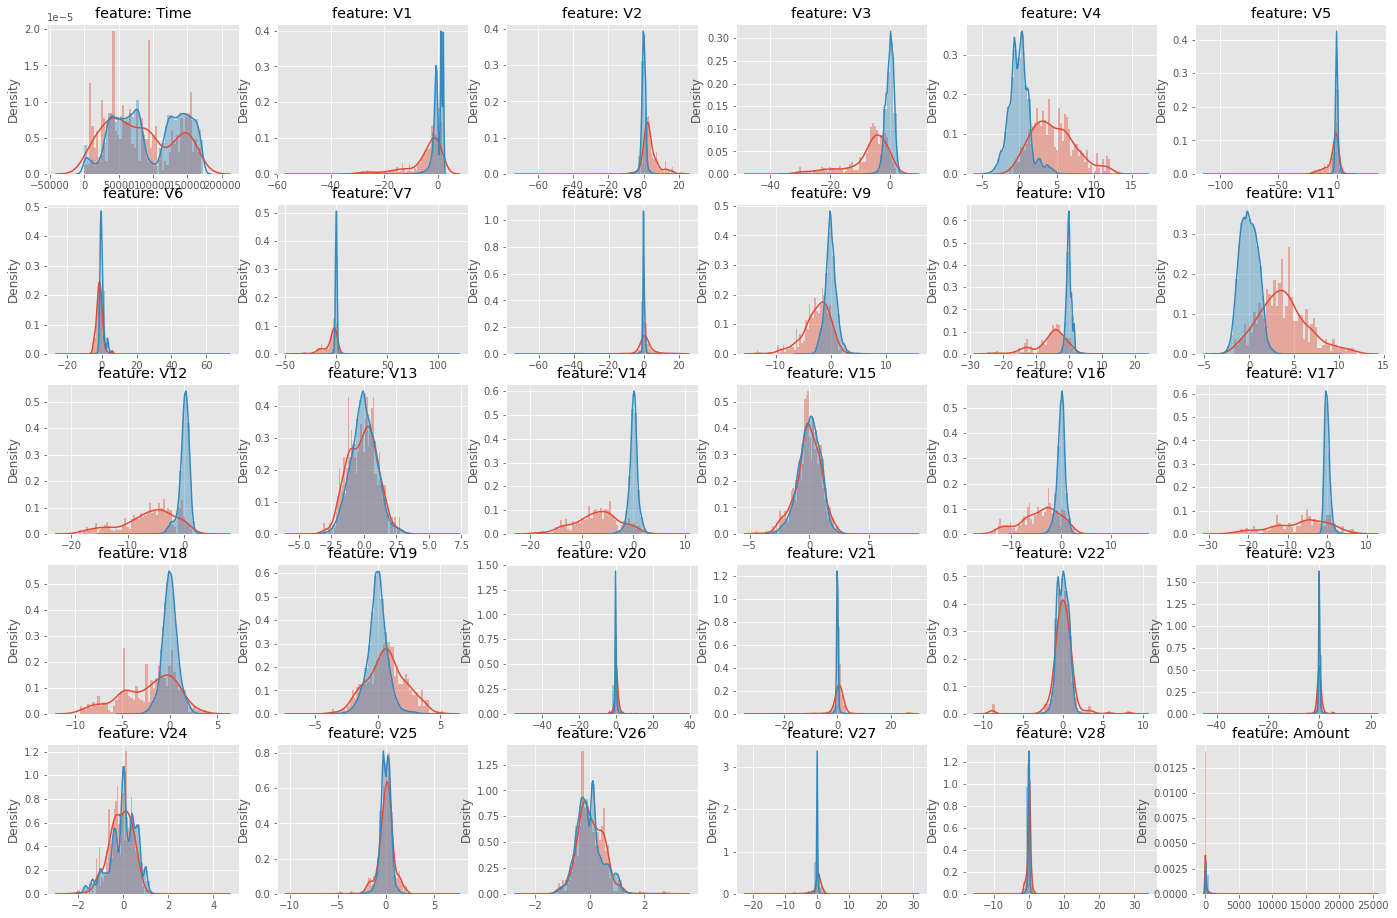

In [6]:
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:30].columns
plt.figure(figsize=(24, 16))
gs = gridspec.GridSpec(5, 6)
for i, cn in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

Regardons de plus près les variables Amount et Time 

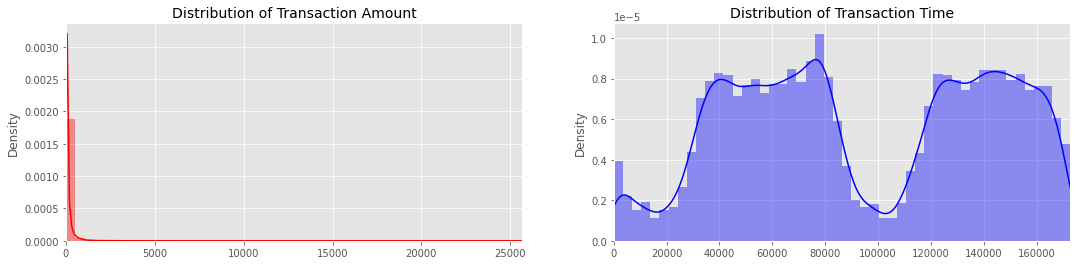

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Au vu des graphiques ci dessus, on choisis de normaliser les colonnes Amount et Time en effet la normalisation d'un ensemble de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique: ils peuvent se comporter mal si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


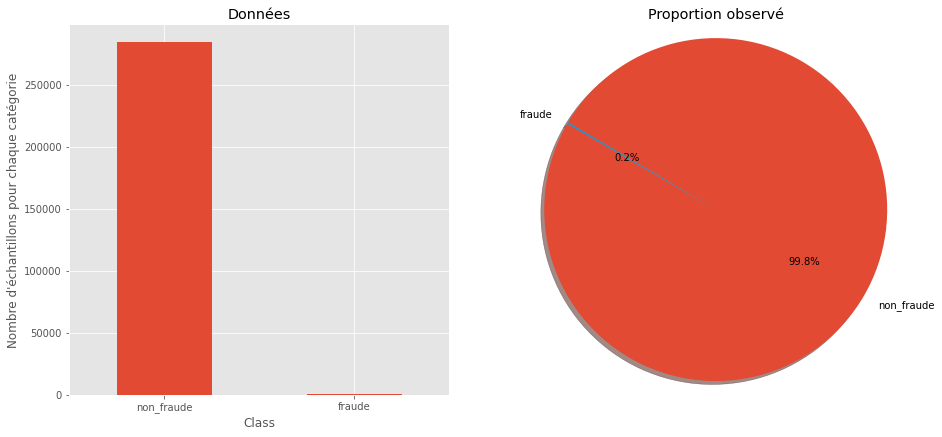

Nous avons 284315 cas de Non-fraude et 492 cas de fraude.


In [10]:
class_= ['non_fraude', 'fraude']
plt.figure(figsize=(15,15))
y_train_df = pd.DataFrame(data = df, columns = ['Class'])
y_test_df = pd.DataFrame(data = df, columns = ['Class'])
plt.subplot(221)
y_train_df['Class'].value_counts().plot(kind = 'bar',rot=0)
plt.xticks(range(2), class_)
plt.xlabel('Class')
plt.ylabel("Nombre d'échantillons pour chaque catégorie")
plt.title('Données')
plt.subplot(222)
sizes = np.bincount(df['Class'])
explode = (0, 0)  
plt.pie(sizes, explode=explode, labels=class_,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion observé')
plt.show()
print("Nous avons {0} cas de Non-fraude et {1} cas de fraude.".format(sizes[0], sizes[1]))

Regardons maintenant la matrice de corrélation

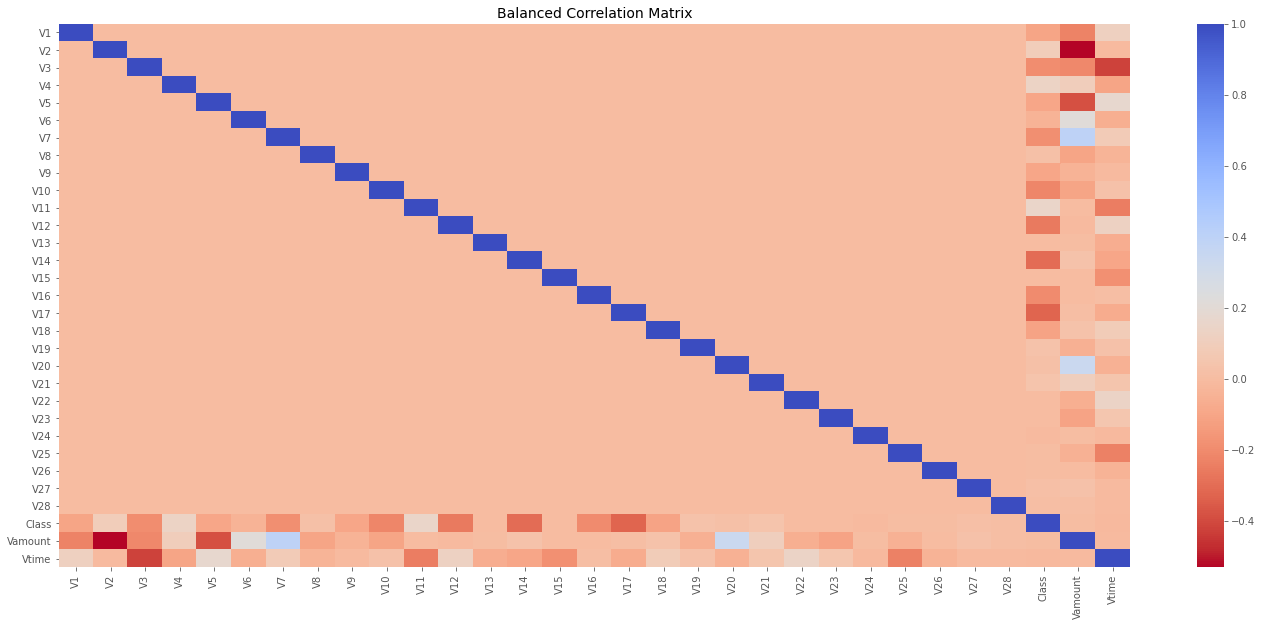

In [11]:
import seaborn as sns
f, ax1 = plt.subplots(figsize=(24,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14);

Nous constatons une différence significatif de nos données .... Nous allons devoir équilibré nos données pour avoir le meme nombre de cas de fraude et de non fraude 

Comme nous l'avons vu, les corrélations ne peuvent être correctement visualisées en raison du déséquilibre de l'ensemble des données. En effet, la matrice de corrélation est affectée par le déséquilibre élevé entre les classes. Donc, équilibrons nos classes et visualisons à nouveau la matrice de corrélation.. 

Nous verrons plus tard, comment exploiter cette information en vue d'améliorer la performance des algorithmes dans la seconde partie.

On crée maintenant un nouveau dataset  **new_df** avec nos données équilibrés

Text(0, 0.5, 'Frequency')

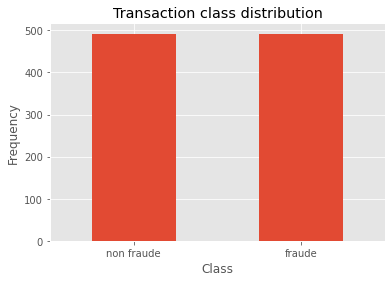

In [12]:

df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
new_df = new_df.sample(frac=1, random_state=42)

class_ = ['non fraude','fraude']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), class_)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
6719,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,-6.810813,...,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1,-0.349231,-1.819381
71981,-0.222258,0.326262,1.838823,-0.238252,-0.219975,-0.379915,0.452644,-0.477951,0.535766,0.310548,...,0.189892,-0.012497,0.076339,-1.229623,0.780699,-0.441508,-0.244954,0,-0.229689,-0.848589
154697,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,1,-0.322884,0.164486
22357,1.258828,-0.054322,0.315484,-0.111736,-0.496857,-0.702449,-0.151799,-0.055458,0.358860,-0.212199,...,-0.243853,0.086107,0.126734,0.143760,0.992463,-0.071805,-0.001595,0,-0.350151,-1.318497
242479,1.971792,0.106084,-1.672058,0.768340,0.238062,-0.920856,0.109870,-0.239020,0.665796,-0.719565,...,0.315095,0.097633,1.039779,0.066570,0.580922,-0.040436,-0.015019,0,-0.258275,1.193861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247236,1.899346,0.785212,-2.742960,1.583528,1.166841,-1.065790,0.500420,-0.248132,-0.274647,-1.034337,...,0.452065,-0.167596,-0.744824,0.343759,-0.421852,0.043217,0.023111,0,-0.168678,1.236103
20643,-0.771071,-0.233622,1.073457,-2.470349,-1.266976,-0.533868,-0.806434,0.675338,-2.365761,0.960733,...,0.128657,0.082665,0.143666,-0.471444,-0.404083,0.266970,0.115328,0,-0.293258,-1.339976
64411,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,-5.996596,...,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,1,0.046539,-0.919786
274892,-5.236280,5.043792,-2.306464,-2.078295,0.163855,-1.045945,1.612720,-0.773146,5.660115,8.575497,...,0.878521,-0.015556,0.568461,0.253155,-0.415358,0.988507,-0.635456,0,-0.346073,1.504634


Parfait, nous avons un partage 50/50 !

Regardons la nouvelle matrice de corrélation 

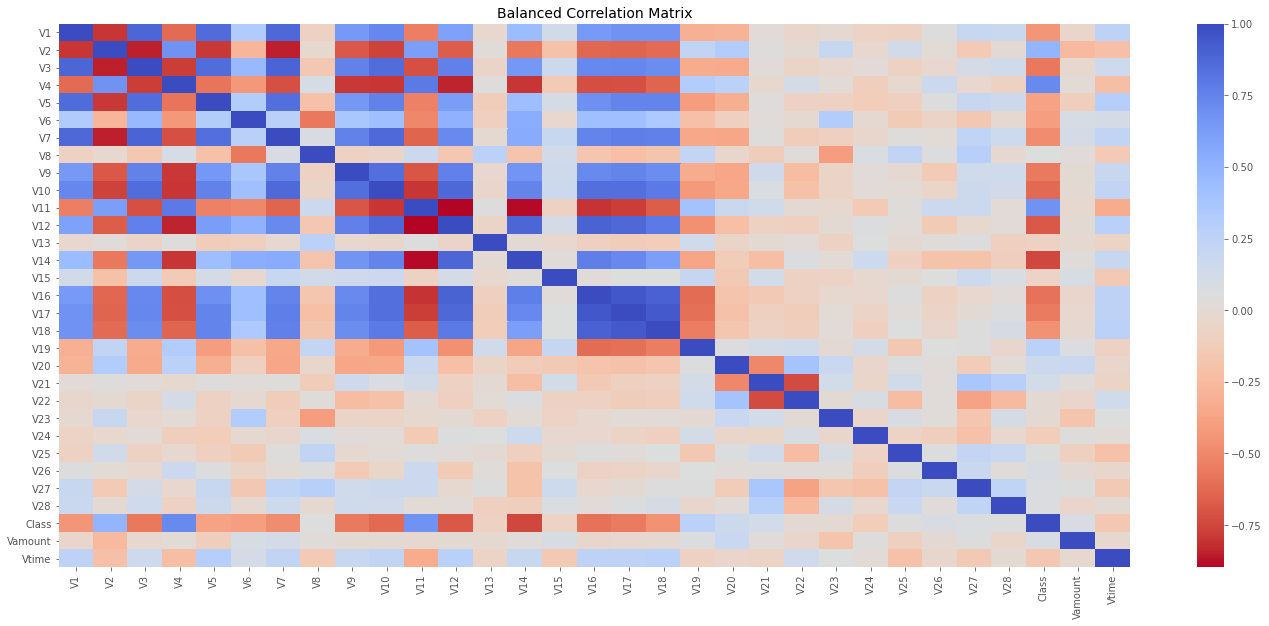

In [14]:
import seaborn as sns
f, ax1 = plt.subplots(figsize=(24,10))
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14);

Nous pouvons voir à partir de la sortie quelles variables sont fortement corrélées positivement et négativement. Certaines d'entre elles sont fortement corrélées.

Maintenant, si nous regardons le bas cette figure, nous pouvons voir la corrélation entre les caractéristiques et la classe (fraude ou non fraude). Nous sommes en mesure d'établir ce qui suit :

V2, V4, V11 et V19 sont tous en corrélation très positive avec la classe. Cela signifie que plus la valeur d'une de ces caractéristiques est élevée, plus il est probable qu'il s'agisse d'une opération frauduleuse.

V10, V12, V14 et V16 présentent toutes une corrélation très négative avec la classe. Cela signifie que plus la valeur de l'une de ces caractéristiques est faible, plus il est probable qu'il s'agisse d'une opération frauduleuse.


Malgré tout celà nous choisisons de ne pas enlever les variables en fortes corrélation.

In [15]:
Data=new_df.drop(['Class'], axis = 1)

Target = new_df["Class"] 
print(Data.shape) 
print(Target.shape) 

(984, 30)
(984,)


In [16]:
Data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Vamount,Vtime
6719,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,-6.810813,...,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,-0.349231,-1.819381
71981,-0.222258,0.326262,1.838823,-0.238252,-0.219975,-0.379915,0.452644,-0.477951,0.535766,0.310548,...,-0.035452,0.189892,-0.012497,0.076339,-1.229623,0.780699,-0.441508,-0.244954,-0.229689,-0.848589
154697,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,-5.110728,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,-0.322884,0.164486
22357,1.258828,-0.054322,0.315484,-0.111736,-0.496857,-0.702449,-0.151799,-0.055458,0.358860,-0.212199,...,-0.091938,-0.243853,0.086107,0.126734,0.143760,0.992463,-0.071805,-0.001595,-0.350151,-1.318497
242479,1.971792,0.106084,-1.672058,0.768340,0.238062,-0.920856,0.109870,-0.239020,0.665796,-0.719565,...,0.011733,0.315095,0.097633,1.039779,0.066570,0.580922,-0.040436,-0.015019,-0.258275,1.193861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247236,1.899346,0.785212,-2.742960,1.583528,1.166841,-1.065790,0.500420,-0.248132,-0.274647,-1.034337,...,0.124461,0.452065,-0.167596,-0.744824,0.343759,-0.421852,0.043217,0.023111,-0.168678,1.236103
20643,-0.771071,-0.233622,1.073457,-2.470349,-1.266976,-0.533868,-0.806434,0.675338,-2.365761,0.960733,...,-0.020541,0.128657,0.082665,0.143666,-0.471444,-0.404083,0.266970,0.115328,-0.293258,-1.339976
64411,-10.527304,7.639745,-13.443115,4.303403,-8.048210,-3.466997,-8.643193,7.284105,-2.362097,-5.996596,...,0.937416,-0.931178,-0.235697,-0.031393,0.591558,-0.263516,1.108897,0.219021,0.046539,-0.919786
274892,-5.236280,5.043792,-2.306464,-2.078295,0.163855,-1.045945,1.612720,-0.773146,5.660115,8.575497,...,-0.734787,0.878521,-0.015556,0.568461,0.253155,-0.415358,0.988507,-0.635456,-0.346073,1.504634


Une **matrice de confusion** permet d'évaluer la qualité d'une classification et nous donne un aperçu du classement de nos points.

La matrice de confusion fournit:

$\bullet$ Nombre de vrai positif (TP)

$\bullet$ Nombre de faux positif (FP)

$\bullet$ Nombre de faux négatif (FN)

$\bullet$ Nombre de vrai négatif (TN)


Et ce sont ces informations obtenues par la matrice de confusion qui nous permettent de calculer la précision et la courbe ROC.

![Dossier.](https://i.stack.imgur.com/7QIRU.gif)

Fonction report qui affichera :
    
- la matrice de confusion 
- la courbe Roc
- le rapport de classification

In [17]:
from sklearn.metrics import confusion_matrix

def report(name,y_test, y_pred,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    cm=confusion_matrix(y_test, y_pred)
    target_names = class_
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
     
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    print("------------------------------------------------Rapport de " +name+ "-------------------------------------------")
#1 Confusion Matrix     
    plt.figure(figsize=(15, 15))
    plt.subplot(221)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    cmlabels = ['Vrais négatifs', 'Faux positifs',
              'Faux négatifs', 'Vrais positifs']
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    l=[]
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        l.append(cm[i,j])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j])+ "\n" + cmlabels[l.index(cm[i, j])],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
        else:
            plt.text(j, i, "{:,}".format(cm[i, j])+ "\n" + cmlabels[l.index(cm[i, j])],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    #plt.show()
#2 Roc Curves 
    a=y_test
    prediction=y_pred
    yp_dum=pd.get_dummies(a)
    yt_dum=pd.get_dummies(prediction)
    CM = confusion_matrix(a, prediction)
    class_names=np.unique(np.array(CM)) #Utilisé pour la visualisation de la matrice de confusion.
  # Calculer la courbe ROC et l'aire ROC pour chaque classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_)):
        fpr[i], tpr[i], _ = roc_curve(yt_dum[i], yp_dum[i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    #plt.figure() 
    colors=["blue","red"]
    class_list=np.unique(np.array(y_test))
    plt.subplot(222)
    for i, color, transac in zip(range(len(class_)), colors, class_list):
        
        plt.plot(fpr[i], tpr[i], color=color,label='Courbe ROC de la classe %s (aire = %.2f)' %(class_[transac], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrai positifs')
    plt.title('Une certaine extension de la caractéristique de fonctionnement du récepteur à plusieurs classes')
    plt.legend(bbox_to_anchor=(1.05,1),loc="upper left",borderaxespad=0.)
    plt.subplots_adjust(wspace=.3)
    plt.show()
#3 classification report
    print(metrics.classification_report(y_test, y_pred))

Nous allons maintenant définir une fonction predict qui nous permettra de tester nos modèles et d'afficher les scores dans un Data Frame

In [18]:
test_results = {}
train_results = {}
algos=[] # nom des algos


In [19]:
### cette fonction s'éxécute avec un ordre précis pour bien nommer les algoritmes utilisé pour le résultat final 
# et l'utilisation d'une grille
def predict(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    l=list(test_results.keys())

    # librairie xgboost cas particulier 
    if  str(algo_name)[0:str(algo_name).find('(')]=='XGBClassifier':
        algo_name.fit(X_train, y_train,eval_metric=["error", "logloss"])
    else:
        if len(l)>0:
            if (str(algo_name)[0:str(algo_name).find('(')]=='GridSearchCV') and (l[-1]=='XGBClassifier_'):
                algo_name.fit(X_train, y_train,eval_metric=["error", "logloss"])
            else:
                algo_name.fit(X_train, y_train)
        else: 
            algo_name.fit(X_train, y_train)

    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 5)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 5)
    if str(algo_name)[0:str(algo_name).find('(')]=='GridSearchCV':
        test_results[l[-1]+'GridSearchCV'+'_'+str(atype)] = acc_val   # ds str(algo_name) on recupe le nom
        train_results[l[-1]+'GridSearchCV'+'_'+str(atype)] = acc_train
        algos.append(l[-1]+'GridSearchCV')
    else:
        test_results[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val   # ds str(algo_name) on recupe le nom
        train_results[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
        algos.append(str(algo_name)[0:str(algo_name).find('(')])
        
    if verbose ==0:
        print(str(algo_name)[0:str(algo_name).find('(')]+" Training Accuracy: " + str(acc_train)+"%")
        print(str(algo_name)[0:str(algo_name).find('(')]+" Testing  Accuracy: "+ str(acc_val)+"%")
    else:
        return Y_pred

Nous fixons maintenant, et pour la suite de cette étude, les données qui seront utilisées pour l’entrainement d’une part, et celle qui nous servirons au test afin de donner un score qui soit comparable pour chacune des techniques utilisées.  

L’opération que nous réalisons consiste à attribuer 70% des données en vue de la phase d’entrainement, et les 30% restantes, aux données test.

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Data, Target, test_size =0.3, random_state=42)

In [21]:
print("Nombre de transactions x_train dataset: ", x_train.shape) 
print("Nombre de transactions y_train dataset: ", y_train.shape) 
print("Nombre de transactions x_test dataset: ", x_test.shape) 
print("Nombre de transactions y_test dataset: ", y_test.shape)

Nombre de transactions x_train dataset:  (688, 30)
Nombre de transactions y_train dataset:  (688,)
Nombre de transactions x_test dataset:  (296, 30)
Nombre de transactions y_test dataset:  (296,)


# <a name="2">II. Apprentissage </a>

## <a name="knn"> K-nearest neighbors</a>

Nous commençons l’étude en appliquant l’algorithme k-NN des plus proches voisins.
C’est probablement l’un des plus simples algorithmes d’apprentissage. Nous savons qu’il fournit souvent de bons résultats. De plus, il n’est pas influencé par la taille des classes qu’il délivre, ce qui peut être très avantageux dans notre cas.

En outre, l’algorithme k-NN dépend des paramètres imposés par l’initialisation. Cela induit que la performance des résultats change en fonction des paramètres choisis.

La règle des k-plus proches voisins consiste à prédire une classe pour $ x\in\mathbb{R}^d$.

Soit $(X_{(1)},Y_{(1)}),...,(X_{(n)},Y_{(n)})$ un ré-arrangement des données d'apprentissage, tel que pour un $k$ fixé, on a:

$$||X_{(1)}-x||\leq...\leq||X_{(k)}-x||$$



Nous allons fixer une grille (pas Grid Search) de valeurs pour k , puis choisir la valeur minimisant l'erreur de classification associé à l'algorithme des [**K-plus proches voisins**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

In [22]:
from sklearn.model_selection import GridSearchCV  # pour la suite

In [23]:
from sklearn.neighbors import KNeighborsClassifier
errors = []
for k in range(1,40):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))

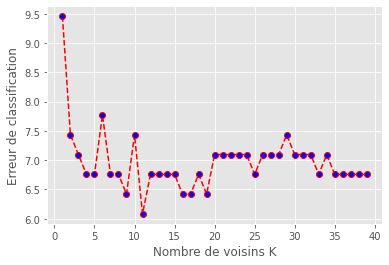

In [24]:

plt.plot(range(1,40), errors,color="red",linestyle="dashed",marker='o',markerfacecolor="blue")
plt.xlabel("Nombre de voisins K")
plt.ylabel("Erreur de classification")
plt.show()


In [25]:
errors.index(min(errors)) +1

11

D'après l'algorithme ci-dessus qui nous illustre l'erreur de classification en fontion du nombre de voisins, l'erreur est instable ici elle est minimal pour k=11. De plus nous ne voyons clairement pas si l'erreur diminue de plus en plus pour des valeurs paires ou impaires de k ou tout simplement pour des valeurs plus grande . On choisi donc **K=11**.

In [26]:
knn = KNeighborsClassifier(n_neighbors=errors.index(min(errors)) +1)
predict(knn,x_train,y_train,x_test,y_test)
y_pred = knn.predict(x_test)

KNeighborsClassifier Training Accuracy: 94.0407%
KNeighborsClassifier Testing  Accuracy: 93.91892%


La précision obtenue avec la méthode des K plus proches voisins est **$94.59459\%$** pour **K=2** sur nos données de Test

------------------------------------------------Rapport de KNN-------------------------------------------


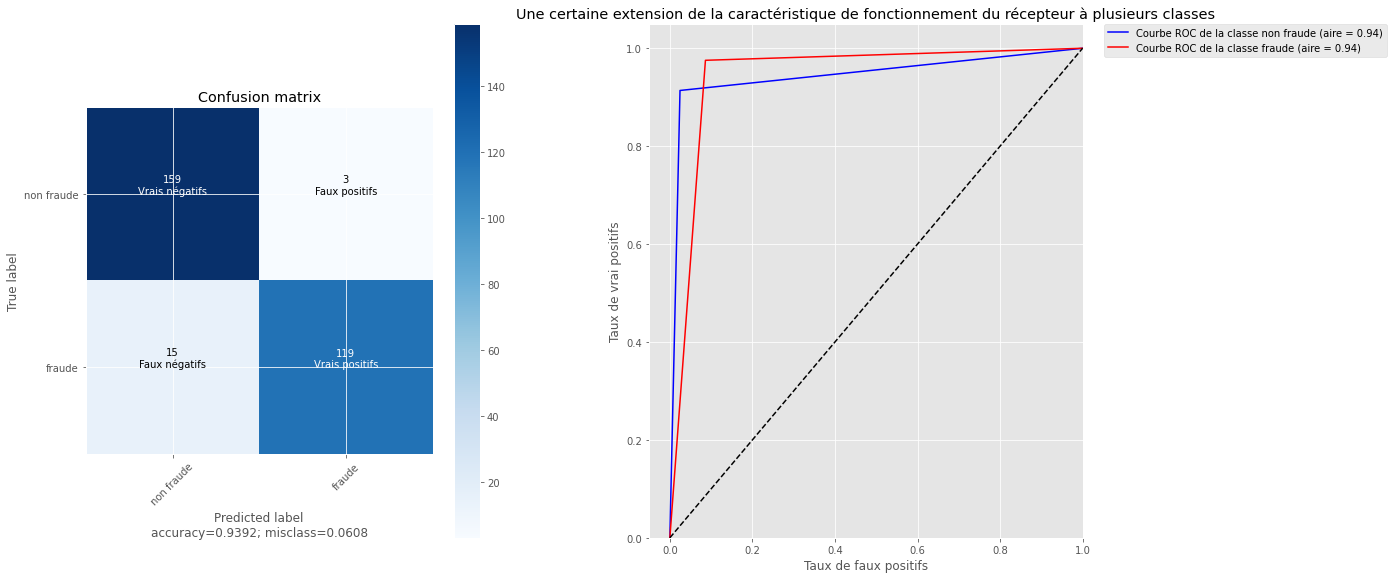

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       162
           1       0.98      0.89      0.93       134

    accuracy                           0.94       296
   macro avg       0.94      0.93      0.94       296
weighted avg       0.94      0.94      0.94       296



In [27]:
report('KNN',y_test, y_pred, 
                      normalize    = False)

Comme attendu, on voit bien sur la matrice de confusion que le modèle prédit bien les cas de fraude. L’erreur de classification est de l’ordre de 4% sur nos donnée de Test. Ce qui n'est pas mal.

## <a name="reglog">Régression logistique</a>

La régression logistique est sans doute le modèle le plus répandu dans les problèmes de classification binaire. Cet algorithme offre un bon compromis entre performance du modèle et pouvoir explicatif. <br>
En effet, il entraine souvent une variance relativement petite, c’est pourquoi c’est un algorithme peu sujet au sur-apprentissage (over-fitting).

Soit $(X,Y)\in\mathbb{R}^d\times C$, avec C={1,2} et $X|(Y=i) \sim \mathcal{N}(\mu_{i},\Sigma)$
Pour chaque i dans C, le log-ratio posterieur est donné par : 

$$log\Big(\frac{\mathbb{P}(Y=i|X=x)}{\mathbb{P}(Y=C|X=x)}\Big)=\alpha_{i}+\beta_{i}^Tx$$
où, $$\alpha_{i}=log(\frac{\pi_{i}}{\pi_{C}})-\frac{1}{2}log\bigg(\frac{|\Sigma_{i}|}{|\Sigma_{C}|}\bigg)+\frac{1}{2}\mu_{C}^T\Sigma^{-1}\mu_{C}-\frac{1}{2}\mu_{i}^T\Sigma^{-1}\mu_{i}$$ et $$\beta_{i}=\Sigma^{-1}(\mu_{i}-\mu_{C})$$

La régression logistique suppose que pour chaque classe i dans [C-1], il existe $(\alpha_{i}^*,\beta_{i}^*)\in\mathbb{R}\times\mathbb{R}^d$ tel que pour tout x dans $\mathbb{R}^d$, 

$$log\Big(\frac{\mathbb{P}(Y=i|X=x)}{\mathbb{P}(Y=C|X=x)}\Big)=\alpha_{i}^*+(\beta_{i}^*)^Tx$$  

Aplliquons la [**Régréssion logistique**](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [28]:
from sklearn import linear_model

modele_regression_logistique = linear_model.LogisticRegression(solver='lbfgs')
predict(modele_regression_logistique,x_train,y_train,x_test,y_test)
y_pred = modele_regression_logistique.predict(x_test)

LogisticRegression Training Accuracy: 95.63953%
LogisticRegression Testing  Accuracy: 94.59459%


On obtient un score de 94.59% sur nos données de Test!

------------------------------------------------Rapport de Logistic regression-------------------------------------------


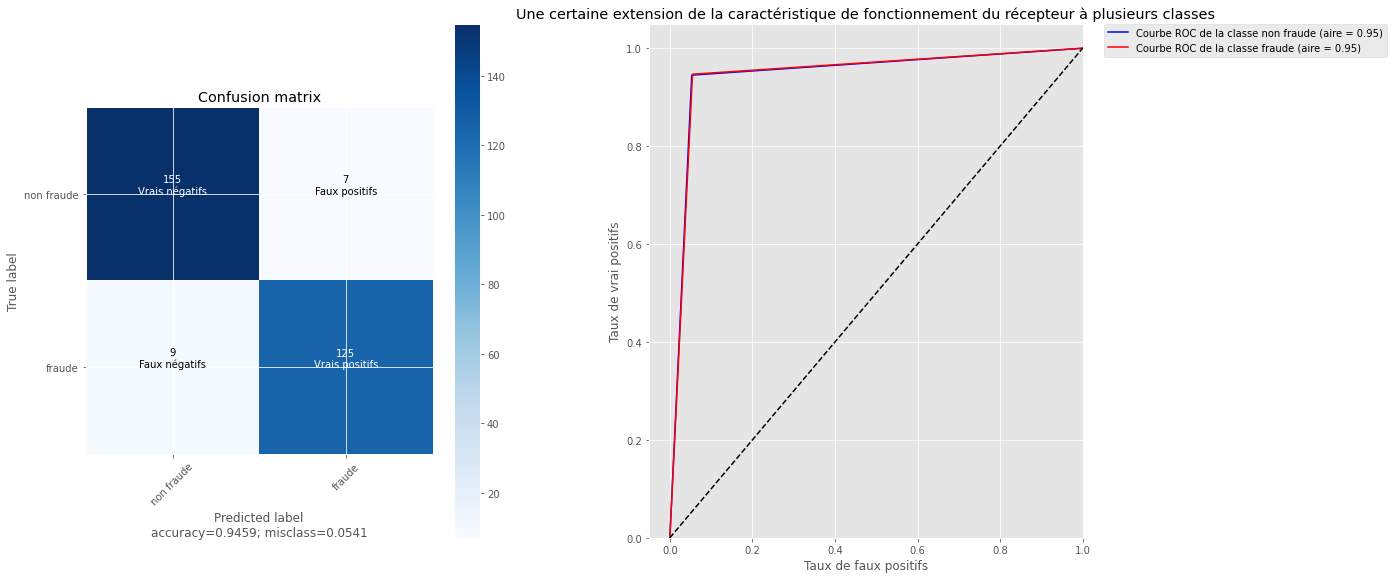

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.95      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.95       296
weighted avg       0.95      0.95      0.95       296



In [29]:
report('Logistic regression',y_test, y_pred, 
                      normalize    = False)

Pour des fins d'optimisation de notre modèle, nous allons fixer une grille de valeurs pour les paramètres **penality** et **C**.

In [30]:
modele_regression_logistique = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

hyperparameters = dict(C=C, penalty=penalty)

In [31]:
clf = GridSearchCV(modele_regression_logistique, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train, y_train)

In [32]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


Dans notre cas les paramètres optimaux sont:

$\bullet Penalty: l2$ 

$\bullet C: 0.1$

In [33]:
y_pred = best_model.predict(x_test)
predict(best_model,x_train,y_train,x_test,y_test)

GridSearchCV Training Accuracy: 95.20349%
GridSearchCV Testing  Accuracy: 94.93243%


**La précision obtenue est pratiquement la même que la précèdente, alors que les paramètres optimaux sont proches des paramètres choisis au départ.**

------------------------------------------------Rapport de Logistic regression-------------------------------------------


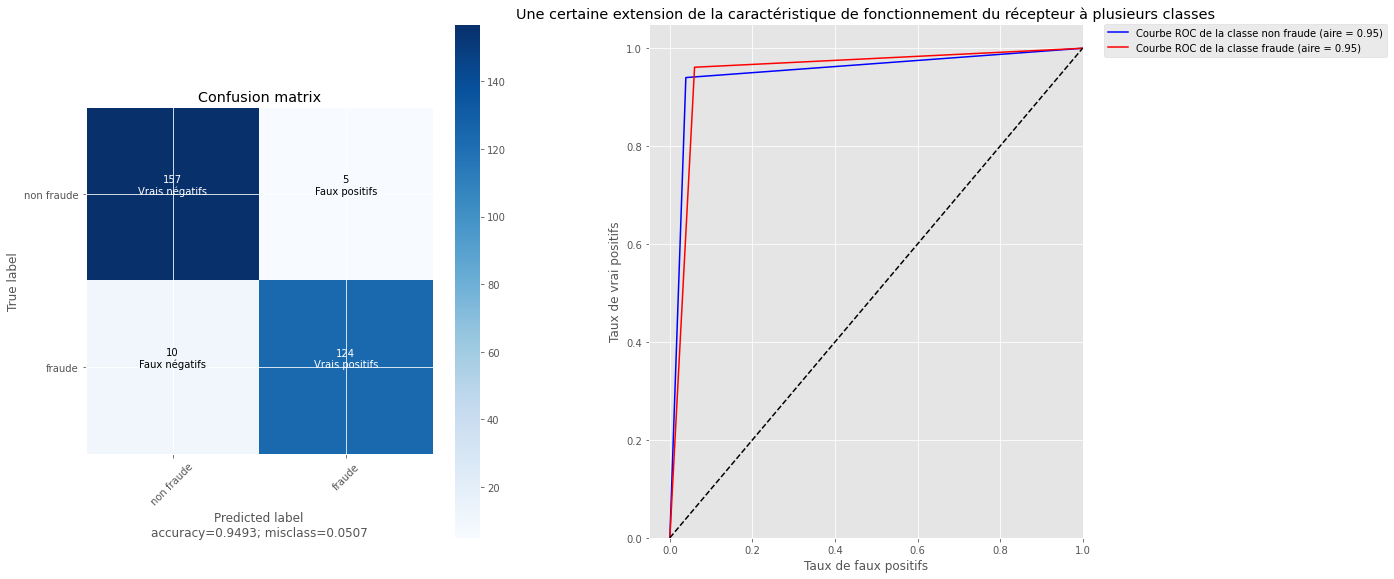

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       162
           1       0.96      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [34]:
report('Logistic regression',y_test, y_pred, 
                      normalize    = False)

## <a name="nb">Naïves Bayes</a>

La classification Naïve Bayes est une méthode de classification rapide et simple à comprendre. Sa rapidité est due à certaines simplifications que nous faisons sur les distributions de probabilité sous-jacentes, à savoir, l'hypothèse sur l'indépendance des caractéristiques. Pourtant, il peut être assez puissant, surtout lorsqu'il y a suffisamment de fonctionnalités dans les données.

Supposons que nous ayons pour chaque étiquette L une distribution de probabilité. Cette distribution donne la probabilité pour chaque combinaison possible de caractéristiques (un vecteur de caractéristiques):

$$P(features | L).$$


L'idée principale de la classification bayésienne est d'inverser le sens de la dépendance: nous voulons prédire l'étiquette en fonction des caractéristiques:

$$P(L | features)$$

Ceci est possible par le théorème de Bayes : 
$$P(L | features) = \frac{P(features | L)P(L)}{P(features)}.$$

Supposons que nous ayons les étiquettes L1 et L2, et leurs distributions associées: $P(features|L1)$ et $P(features|L2)$. Si nous avons un point de données avec des «caractéristiques», dont nous ne connaissons pas l'étiquette, nous pouvons essayer de le prédire en utilisant le rapport des probabilités postérieures:

$$\frac{P(L1 | features)}{P(L2 | features)} = \frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}.$$

Si le rapport est supérieur à un, nous étiquetons notre point de données avec l'étiquette L1, et sinon, nous lui donnons l'étiquette L2. Les probabilités antérieures $P(L1)$ et $P(L2)$ des étiquettes peuvent être facilement trouvées à partir des données d'entrée, car pour chaque point de données, nous avons également son étiquette. Il en va de même pour les probabilités de caractéristiques conditionnées sur l'étiquette.

avec $x_i$ les features et y = L. 

Appliquons [**Naïve Bayes**](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), dans notre cas les La probabilité des features $x_i$ (caractéristiques) est supposée être gaussienne:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

In [35]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predict(gnb,x_train,y_train,x_test,y_test)
y_pred = gnb.fit(x_train, y_train).predict(x_test)

GaussianNB Training Accuracy: 91.42442%
GaussianNB Testing  Accuracy: 93.24324%


La précision obtenue avec la méthode Naïve Bayes est de **$93.24\%$** sur nos données de Test

------------------------------------------------Rapport de Gaussian Naive Bayes-------------------------------------------


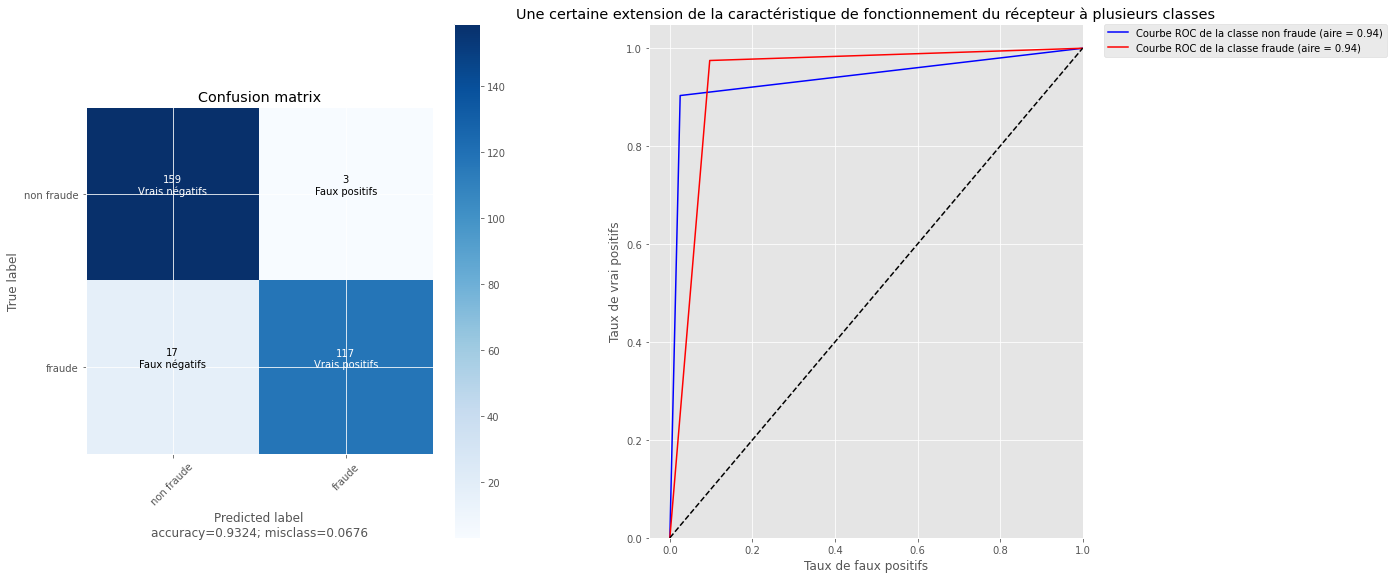

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       162
           1       0.97      0.87      0.92       134

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



In [36]:
report('Gaussian Naive Bayes',y_test, y_pred, 
                      normalize    = False)

## <a name="svm">SVM </a>

Un SVM est un classificateur linéaire binaire qui divise les données en deux classes, une positive et une négative qui portent respectivement le label +1 et -1. La collecte des données d'entraînement $\mathcal{D}$ est alors constituée de "n" points et de leurs étiquettes :

$$\mathcal{D} = \left\{ (\mathbf{x}_i, y_i)\mid\mathbf{x}_i \in \mathbb{R}^p,\, y_i \in \{-1,1\}, i = 1, 2, \dots n \right\}$$.

où $y_i$ est +1 ou -1, pour indiquer à quelle classe appartient le point $\mathbf{x}_i $. Chaque $ \mathbf{x}_i $ est un vecteur réel p-dimensionnel. ; chacun des "p" éléments du vecteur décrit une caractéristique d'une donnée exemple.

Dans la phase d'entraînement, le SVM doit déterminer l'hyperplan de séparation qui sépare les points avec $y_i=1$ des points avec $y_i=-1$. Un hyperplan est déterminé par une équation de la forme

 $$\mathbf{w}\cdot\mathbf{x} - b=0,\,$$

où $\cdot$est le **produit interne** de deux vecteurs. ${\mathbf{w}}$ est le **vecteur normal** qui est perpendiculaire à l'hyperplan et $\tfrac{b}{\|\mathbf{w}\|}$ est la distance de l'hyperplan. à l'origine selon la direction du vecteur normal w est la norme du vecteur ${\mathbf{w}}$).

L'hyperplan de division est déterminé de telle manière que la marge, c'est-à-dire la plus petite distance par rapport à l'hyperplan, soit maximale pour les deux classes afin de garantir la plus grande séparation possible. L'interprétation géométrique est la suivante : l'hyperbolécédron optimal est orthogonal par rapport à la ligne la plus courte entre **l'enveloppe convexe** et les deux classes, et il coupe cette ligne exactement à mi-chemin.

 Pour un ensemble d'entraînement linéairement séparable, un nombre infini de plans de séparation est possible.


L'hyperplan de séparation optimal répond à cette exigence :

$$ \max_{\mathbf{w},b } \min \{ ||\mathbf{x} - \mathbf{x_i} ||| : \mathbf w \cdot \mathbf x + b = 0 , i = 1, \dots n \}$$

Pour construire cet hyperplan optimal, il faut résoudre un **problème d'optimisation**, qui peut être formulé comme suit :

- minimiser en ce qui concerne $\mathbf{w}, b : \frac{1}{2} ||\mathbf w|||^2 $
- avec les conditions $ y_i ( \mathbf w \cdot \mathbf x_i + b) \ge 1, i = 1, \dots n $

Il s'agit d'un problème de programmation quadratique convexe (c'est-à-dire non linéaire). Elle est généralement résolue par le problème de la **Dualité**, qui a la même solution si certaines conditions sont remplies (les conditions dites de Kuhn-Tucker). Le double problème est souvent plus facile à résoudre que le problème primitif, avec des logiciels "prêts à l'emploi".

Notez que l'emplacement de l'hyperplan de séparation ne dépend que d'un petit nombre d'exemples, à savoir ceux qui sont les plus proches de celui-ci. On les appelle les "vecteurs de soutien" (ce sont les points encerclés dans la figure ci-dessus). Les points qui sont plus éloignés de l'hyperplan peuvent être omis de l'ensemble d'entraînement sans changer la position de l'hyperplan ; si un vecteur de soutien est omis, l'hyperplan de séparation change.

Une fois que les valeurs optimales de $\mathbf{w}$, $b$ ont été calculées, le SVM peut classer un nouveau vecteur $\mathbf x_* $dans la phase de décision en calculant la **fonction de décision**.

$$f(\mathbf x) = sgn(\mathbf w \cdot \mathbf x_* + b )$$

ce qui donne +1 ou -1 (ou 0 si le vecteur se trouve exactement sur le plan de séparation).



On choisis dans un premier temps le classifieur SVM : [**SVC**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) avec un kernel : linear, le kernel est un paramètre qui nous permettra d'avoir un meilleur hyperplan

In [37]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear') 
predict(svmclf,x_train,y_train,x_test,y_test)
y_pred= svmclf.predict(x_test)

SVC Training Accuracy: 96.22093%
SVC Testing  Accuracy: 94.93243%


------------------------------------------------Rapport de SVM-------------------------------------------


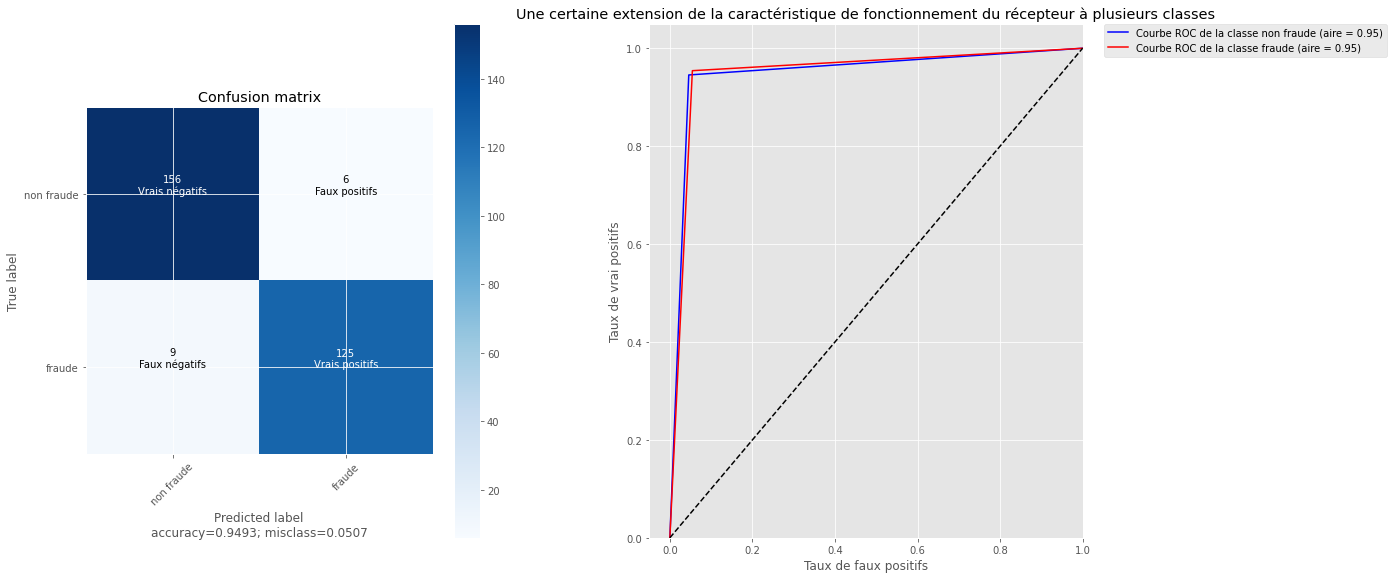

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.95      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [38]:
report('SVM',y_test, y_pred, 
                      normalize    = False)

Le tunage de SVC consiste à choisir une grille  pour les paramètres **kernel**, **gamma** (coefficient pour "rbf", "poly" et "sigmoïde"), et **C** (Paramètre de régularisation)  et chercher à les optimiser.

In [39]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

grid_search = GridSearchCV(
        SVC(), tuned_parameters, cv=5
    )
best_model=grid_search.fit(x_train, y_train)


In [40]:
print('Best Parameters:', best_model.best_estimator_.get_params())

Best Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [41]:
predict(best_model,x_train,y_train,x_test,y_test)
y_pred=best_model.predict(x_test)

GridSearchCV Training Accuracy: 96.36628%
GridSearchCV Testing  Accuracy: 95.27027%


**L'optimisation de nos paramètres a légerment amélioré nos précisions sur nos données de test, le score est de 95.27%.**

------------------------------------------------Rapport de SVM Grille-------------------------------------------


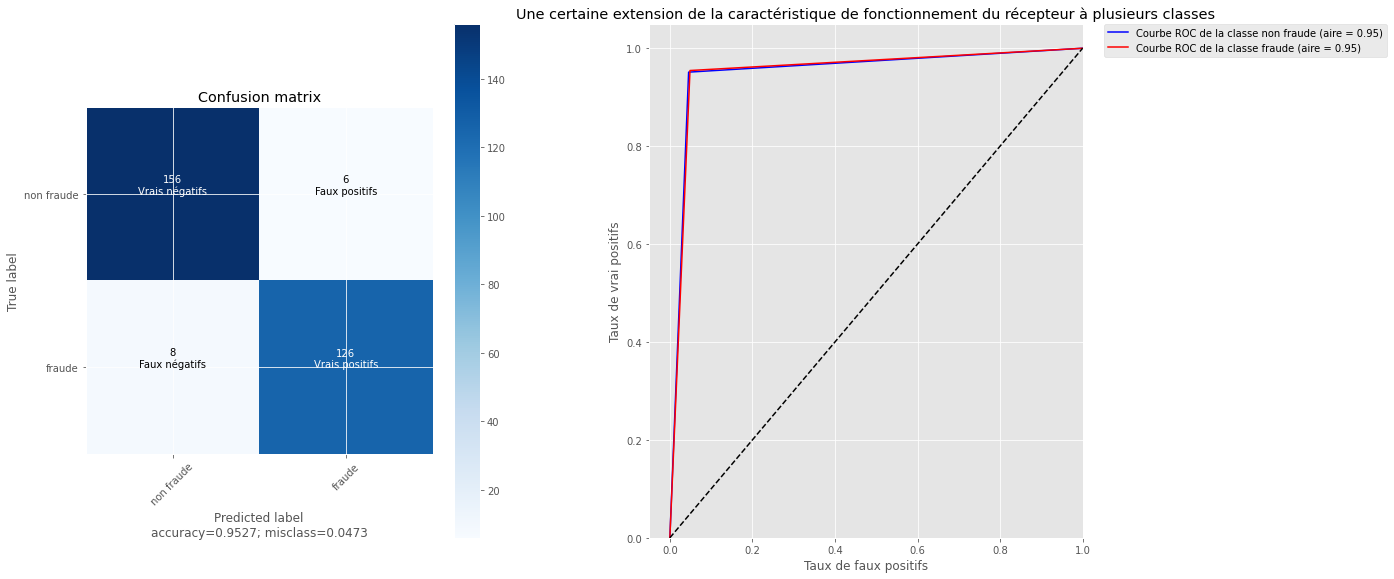

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       162
           1       0.95      0.94      0.95       134

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [42]:
report('SVM Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="dt">Decision Tree </a>

Les arbres de décision, et en particulier les arbres de classification et de régression (CART), sont des estimateurs supervisés introduits par Leo Breiman et al.
Le paradigme d'un arbre de décision binaire consiste à diviser récursivement l'espace $\mathcal X$ avec des règles simples telles que : la variable explicative $x_j$ est-elle supérieure au seuil $\tau$ ou non ?
Ce faisant, on construit un arbre de décision dont chaque nœud correspond à une règle simple (et ensuite à une cellule de partition de $\mathcal X$).
Le résultat final est une partition de $\mathcal X$ par hypercubes.

À chaque étape de l'algorithme d'apprentissage, 

1. considérer la partition $\mathcal P = \{\mathcal X\}$ ;
1. pour chaque cellule $\mathcal A$ de $\mathcal P$, définir la partition à deux cellules
$\mathcal A = \mathcal L_{j, \tau} \cup \mathcal R_{j, \tau}$, où $j \in [d]$ est un indice de caractéristique et $\tau \in \mathbb R$ est un seuil, et
$$
    \begin{cases}
        \mathcal L_{j, \tau} = \left\{ x \in \mathcal A :  x_j \le \tau \right\}\\
        \mathcal R_{j, \tau} = \left\{ x \in \mathcal A :  x_j > \tau \right\}
        %= \mathcal A \backslash \mathcal L_{j, \tau}.
    \end{cases}
$$
sont les parties "gauche" et "droite" de $\mathcal A$.
Ensuite, trouvez la meilleure paire (caractéristique, seuil) pour le fractionnement :
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{\left| \mathcal L_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal L_{j, \tau}) +
    \frac{\left| \mathcal R_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal R_{j, \tau})
$$

où $D$ est une mesure de distorsion pour une cellule (voir ci-dessous) ;
1. remplacer $\mathcal A$ par $\mathcal L_{j, \tau}$ et $\mathcal R_{j, \tau}$ dans la partition $\mathcal P$ ;
1. Passez à 2.

Étant donné une cellule $\mathcal A$, on peut définir le rapport des observations de $\mathcal A$ de la classe $y \in \mathcal Y$ :
$$
    p_y(\mathcal A) = \frac{\left| \left\{ i \in [n] : X_i \in \mathcal A, Y_i=y \right\} \right|}{\left| \mathcal A \right|}.
$$


Ensuite, la distorsion de la cellule $\mathcal A$ peut être :
- Impureté de Gini : $D(\mathcal A) = \sum_{y \in \mathcal Y} p_y(\mathcal A) (1-p_y(\mathcal A))$ (classification) ;
- entropie : $D(\mathcal A) = - \sum_{y \in \mathcal Y} p_y(\mathcal A) \log(p_y(\mathcal A))$ (classification) ;
- erreur quadratique moyenne :  $D(\mathcal A) = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} \left( Y_i - \bar Y_{\mathcal A} \right)^2$, avec $\bar Y_{\mathcal A} = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} Y_i$ (regression).
.

Pour la régression, Jerome Friedman a suggéré un critère amélioré (dans son article original traitant de la stimulation des gradients), appelé erreur quadratique moyenne de Friedman :
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{ \left| \mathcal L_{j, \tau} \right| \left| \mathcal R_{j, \tau} \right| }{ \left| \mathcal L_{j, \tau} \right| + \left| \mathcal R_{j, \tau} \right| }
    \left( \bar Y_{\mathcal L_{j, \tau}} - \bar Y_{\mathcal R_{j, \tau}} \right)^2.
$$

Enfin, plusieurs règles d'arrêt sont intéressantes :
- profondeur maximale de l'arbre ;
- nombre minimal d'observations nécessaires pour diviser un nœud interne ;
- nombre minimal d'observations requises pour se trouver à un nœud de feuille ;
- nombre maximal de nœuds de feuille.

Mettons d'abord en place notre modèle [**Décision Tree**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) avec les paramètres initiaux.

In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
predict(model,x_train,y_train,x_test,y_test)
y_pred= model.predict(x_test)

DecisionTreeClassifier Training Accuracy: 100.0%
DecisionTreeClassifier Testing  Accuracy: 91.55405%


------------------------------------------------Rapport de Decision Tree-------------------------------------------


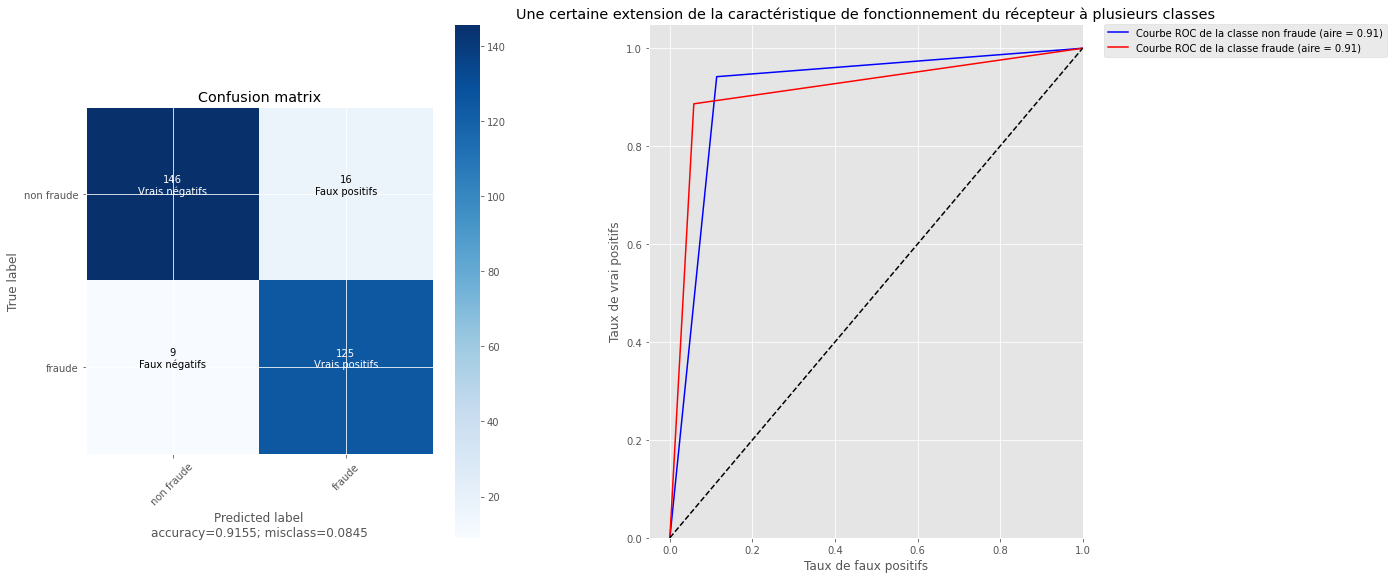

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       162
           1       0.89      0.93      0.91       134

    accuracy                           0.92       296
   macro avg       0.91      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [44]:
report('Decision Tree',y_test, y_pred, 
                      normalize    = False)

Notre tunage de Decision Tree consistera à choisir une grille pour les paramètres **max_depth, criterion et min_samples_split** et chercher à les optimiser.

In [45]:
criterion = ['gini', 'entropy']
max_depth = np.arange(1, 100)
min_samples_split= np.arange(2, 5)


parameters = {"criterion": ["gini", "entropy"], "max_depth": np.arange(1, 100), 
              "min_samples_leaf": list(range(2,7,1))}
    

In [46]:
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters)
best_model=grid_search.fit(x_train, y_train)

In [47]:
print('Best Parameters:', best_model.best_estimator_.get_params())


Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [48]:
predict(best_model,x_train,y_train,x_test,y_test)
y_pred=best_model.predict(x_test)

GridSearchCV Training Accuracy: 94.18605%
GridSearchCV Testing  Accuracy: 93.58108%


**L'optimisation des paramètres nous a permis d'améliorer nos précisions sur nos données de Test, nous sommes passées de 91.55% à 93.6%. Nous sommes également passé de 100% à 94%, sur nos données Train le risque de surajustement est moins évident.**

------------------------------------------------Rapport de Decision Tree Grille-------------------------------------------


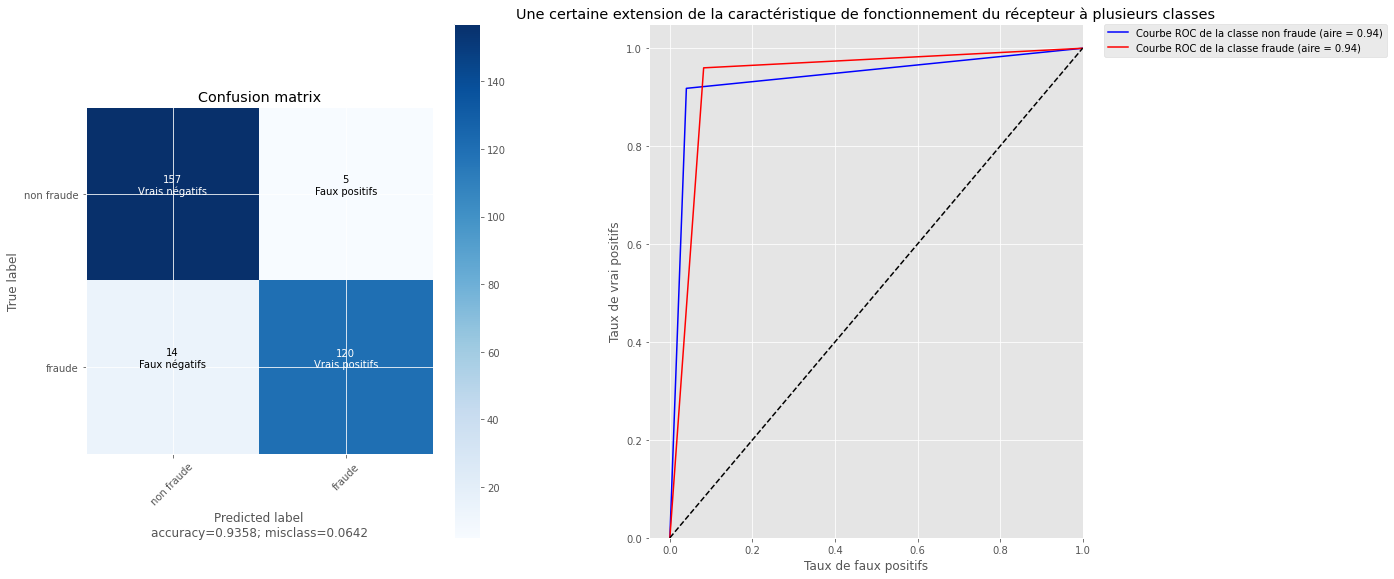

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       162
           1       0.96      0.90      0.93       134

    accuracy                           0.94       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.94      0.94       296



In [49]:
report('Decision Tree Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="rf">Random Forest</a>

Le Random Forest est puissant et précis, rapide à entrainer, et s’adapte à de nombreux problèmes (même ceux non-linéaires).

Le problème avec cet algorithme, c'est qu'il est difficile de pouvoir interpréter les résultats issus des classes, et souvent sujet au sur-apprentissage. De plus, il demande un choix de nombres d'arbres dès l’initialisation. 


Notons que l'assemblage d'arbres de décison construits sur la base d'un tirage aléatoire parmi les observations constitue déja un algorithme à part entiére connu sous le nom de tree bagging. Les random forests ajoutent au tree bagging un échantillonnage sur les variables du probléme, qu'on appelle feature sampling.
On retiendra que : 

$$Random~forest = Tree~bagging + Feature~sampling$$
##### Tree bagging 
Nous disposons comme d'habitude, d'une matrice X de m exemples d'apprentissages chacun décrit par n varriables, et d'un vecteur binaire Y, de dimension m : 

$$X=\begin{pmatrix}
    x_{11}      & \cdots & x_{1n} \\ 
    \vdots & \ddots & \vdots \\ 
    x_{m1}      & \cdots & x_{mm} 
\end{pmatrix}~~~~~~~~~~~~~~~~~~~~~Y=\begin{pmatrix}                         
                                     0 \\
                                     1 \\
                                     . \\[1mm]
                                     . \\[1mm]
                                     0 \\
                                     1 \\
                                     \end{pmatrix}$$
La construction de B arbres se fera comme suit : 

-Tirer aleatoirement et avec remplacement B échatillons de (X,Y), noté $(X_{b},Y_{b})$ 

-Entrainer l'arbre de décision sur $(X_{b},Y_{b})$

##### Feature sampling 
Elle contribue à réduire la variance de l'ensemble créé.
Notant $\rho$ le coéfficient de corrélation des paires de varribales, 
$$V_{random~forest}=\rho\sigma^2+\frac{1-\rho}{B}\sigma^2 $$
   



Utilisons d'abord notre modèle [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) avec les paramètres initiaux et **n_estimators = 100**.

In [50]:
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators = 100)
predict(model,x_train,y_train,x_test,y_test)
y_pred= model.predict(x_test)

RandomForestClassifier Training Accuracy: 100.0%
RandomForestClassifier Testing  Accuracy: 94.93243%


------------------------------------------------Rapport de Random Forest-------------------------------------------


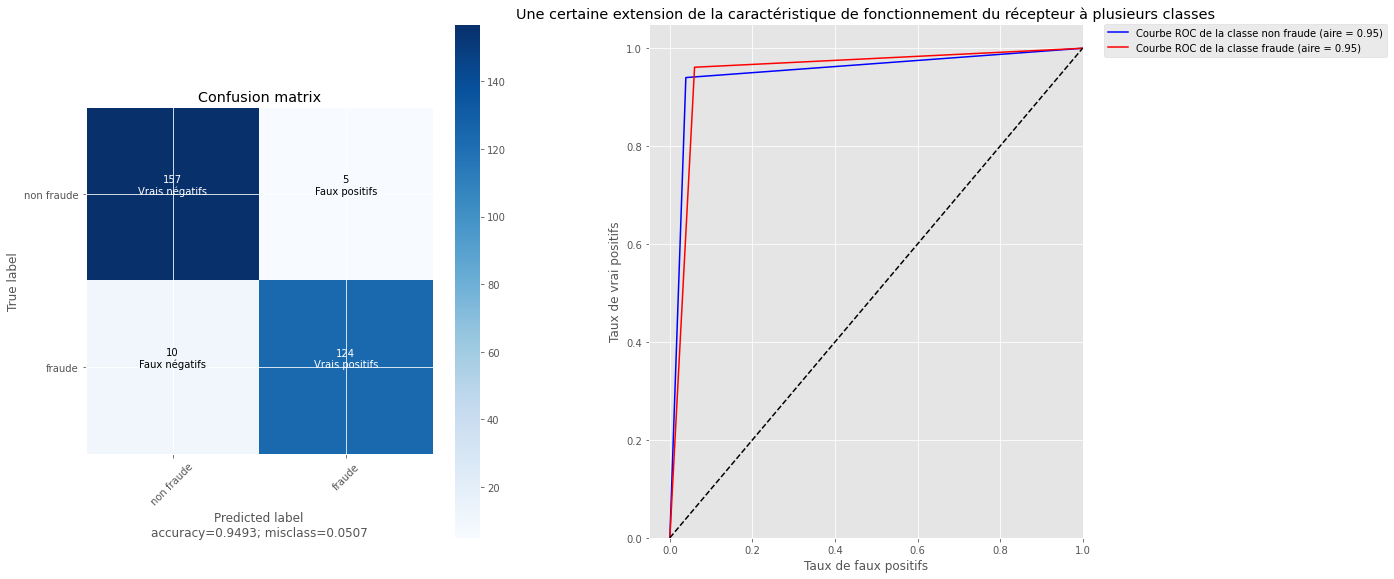

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       162
           1       0.96      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [51]:
report('Random Forest',y_test, y_pred, 
                      normalize    = False)

Le tunage de Random Forest consiste à choisir une grille pour les paramètres **max_depth, n_estimators, n_jobs, bootstrap et criterion** et chercher à les optimiser.

In [52]:
param_grid = {"max_depth": np.arange(1, 10),
              "n_estimators": np.arange(10, 20),
              "min_samples_split":  np.arange(2, 5),
              "criterion": ["gini", "entropy"]}

In [53]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
best_model=grid_search.fit(x_train, y_train)
predict(best_model,x_train,y_train,x_test,y_test)
y_pred=best_model.predict(x_test)

GridSearchCV Training Accuracy: 97.52907%
GridSearchCV Testing  Accuracy: 95.60811%


In [54]:
print('Best Parameters:', best_model.best_estimator_.get_params())

Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 15, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


**L'optimisation des paramètres a légèrement la précision de RandomForest dans les données de Test avec une précision de 95.6%, cependant on obtient une précision de 97.5% pour les données train; il s'agit d'un bon modèle**

------------------------------------------------Rapport de Random Forest Grille-------------------------------------------


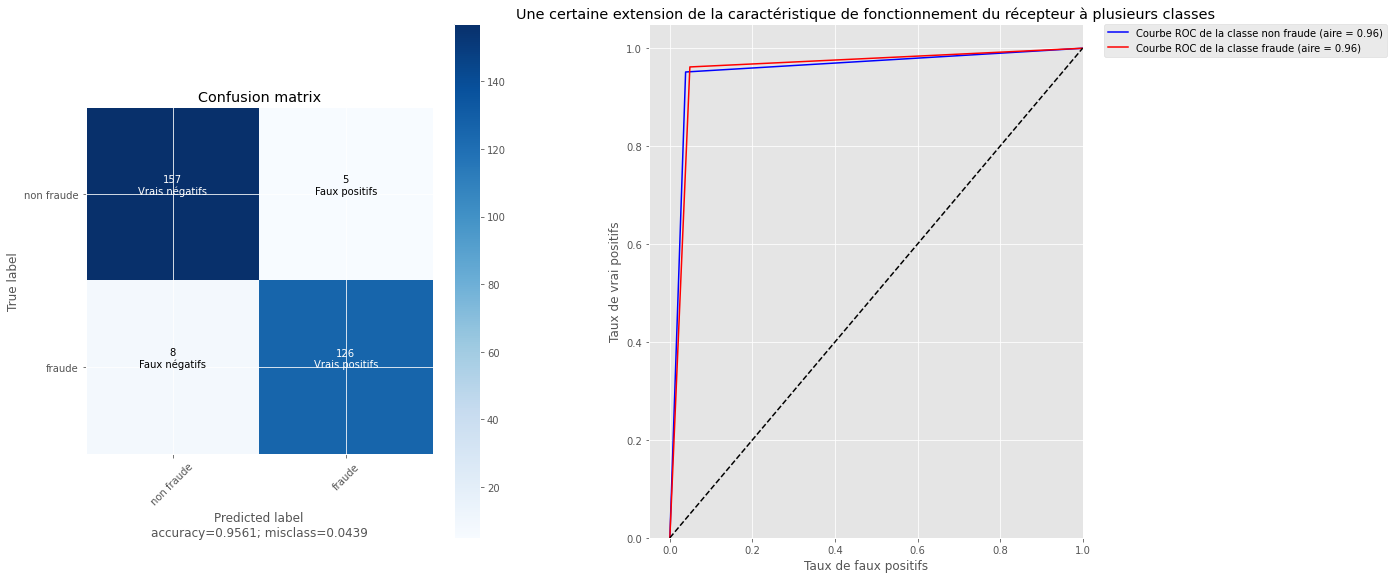

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       162
           1       0.96      0.94      0.95       134

    accuracy                           0.96       296
   macro avg       0.96      0.95      0.96       296
weighted avg       0.96      0.96      0.96       296



In [55]:
report('Random Forest Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="adaboost">Adaboost</a>


AdaBoost (Adaptive Boosting) est un classificateur puissant qui fonctionne bien sur les problèmes de reconnaissance de base et plus complexes. AdaBoost fonctionne en créant un classificateur très précis en combinant de nombreux classificateurs relativement faibles et inexacts. 

Cependant, Adaboost peut être sensible aux données bruyantes et aux valeurs aberrantes.



La perte de classification moyenne d'un classifieur h est donné par:
$$\frac{1}{n}\sum_{i=1}^n\mathbb{1}_{Y_{i}\ne g(Xi)}=\frac{1}{n}\sum_{i=1}^n\mathbb{1}_{Y_{i}g(Xi)<0}$$
Risque empirique pondéré $$\epsilon_{t}=\sum_{i=1}^nD_t(i)\mathbb{1}_{g_t(Xi)\ne Y_{i}}(X_{i})$$
Avec D, la distribution empirique telle que $$D_{t+1}(i)=\frac{\exp(-Y_{i}g_{t}(Xi))}{n\prod_{j=1}^t z_{j}}$$
ou $$z_{t}=2\sqrt{\epsilon_{t}(1-\epsilon_{t})}$$

L'objectif de l'algorithme est de trouver le minimiseur $w_{t}$ telle que 
$$w_{t}=\underset{w\in\mathbb{R}}{\text{argmin}}\frac{1}{n}\sum_{i=1}^n\exp\Bigg(-y_{i}(f_{t-1}(x_{i})+wg_{t}(x_{i}))\Bigg)$$
qui n'est que $$w_{t}=\frac{1}{2}log(\frac{1-\epsilon_{t}}{\epsilon_{t}})$$

Avec $$f_{t}=\sum_{j=1}^t w_{j}g_{j}$$


 Mettons en place notre modèle [Adaboost.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
predict(model,x_train,y_train,x_test,y_test)
y_pred =model.predict(x_test)


AdaBoostClassifier Training Accuracy: 100.0%
AdaBoostClassifier Testing  Accuracy: 94.25676%


------------------------------------------------Rapport de Adaboost-------------------------------------------


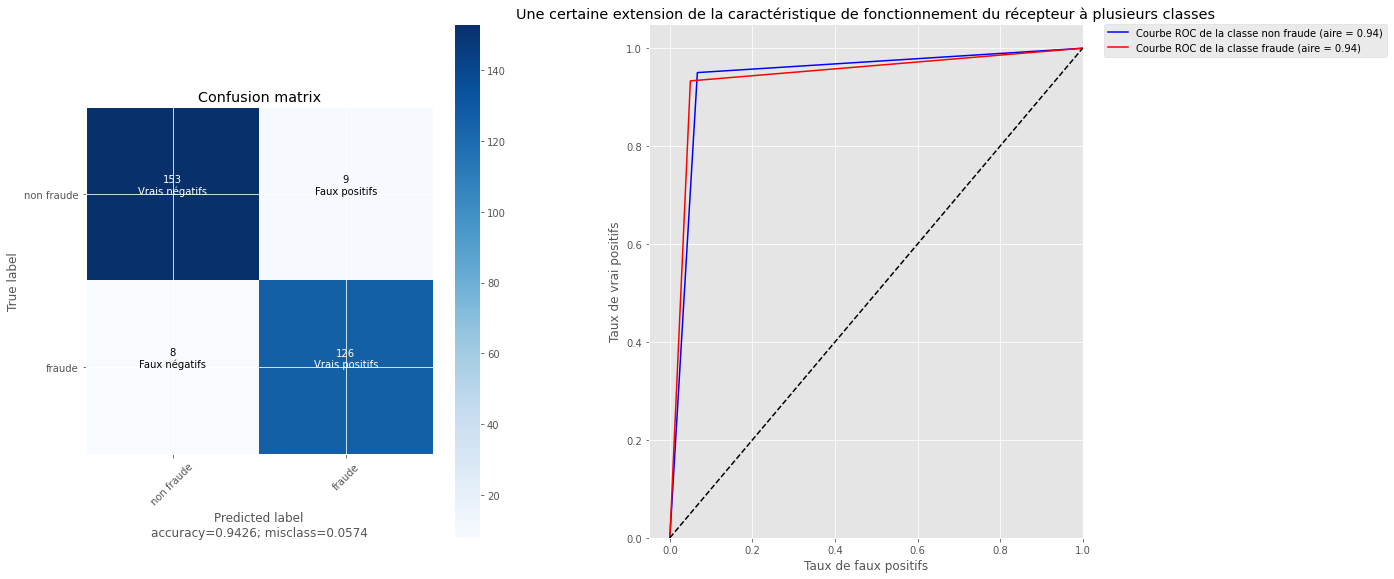

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       162
           1       0.93      0.94      0.94       134

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [57]:
report('Adaboost',y_test, y_pred, 
                      normalize    = False)

Ici nous nous fixons une grille pour le paramètre **learning_rate** (le pas d'apprentissage) et **n_estimators** afin de l'optimiser.

In [58]:
warnings.filterwarnings("ignore")
param_grid = {"learning_rate":[0.001, 0.01, 0.1], 'n_estimators': np.arange(10,300,10)}
grid_search2 = GridSearchCV(model, param_grid=param_grid, cv=5)
warnings.filterwarnings("ignore")
best_model=grid_search2.fit(x_train, y_train)
print('Best Parameters:', best_model.best_estimator_.get_params())
predict(best_model,x_train,y_train,x_test,y_test)
y_pred=best_model.predict(x_test)

Best Parameters: {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 180, 'random_state': None}
GridSearchCV Training Accuracy: 97.09302%
GridSearchCV Testing  Accuracy: 96.62162%


La précision obtenue pour Adaboost sur nos données de test avec Grid search pour s'est légèrement amélioré de 2% nous sommes passés de **94.26% à 96.62%.**

------------------------------------------------Rapport de Adaboost Grille-------------------------------------------


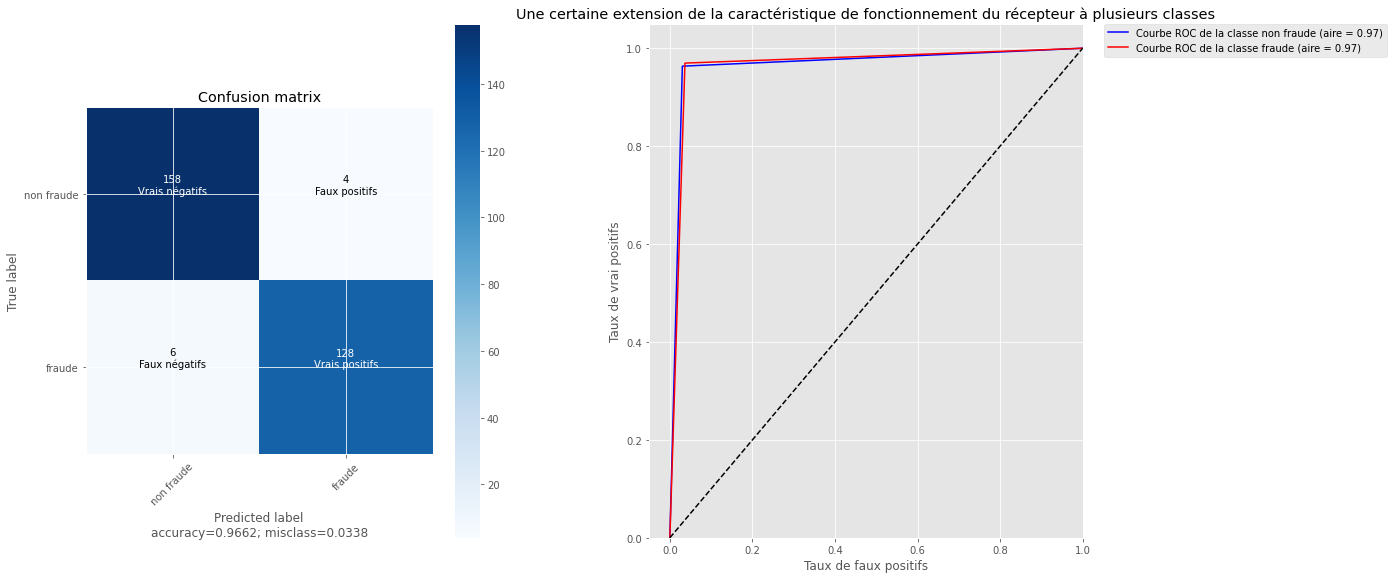

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.97      0.96      0.96       134

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [59]:
report('Adaboost Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="gradboost">Gradient boosting</a>

Le Gradient boosting construit ses arbres un par un et il est notable que chaque nouvel arbre est une aide à la correction les erreurs sur les suivant. A chaque nouvel arbre le modèle devient de plus en plus significatif.


Cependant le temps d’execution est souvent long, et il dépend encore une fois des paramètres d’initialisation (nombres d’arbres, profondeur, et taux d’apprentissage).


Le Gradient boosting est une méthode assembliste non linéaire extrêmement performante.

Le but de cette methode est de trouver $h_{t}$ qui minimise le risque empirique :
$$h_{t}\in \underset{h}{\text{argmin}}\frac{1}{n}\sum_{i=1}^nL\bigg(Y_{i},f_{t-1}(X_{i})+h(X_{i})\bigg)$$
où le minimum est pris sur une classe d'intérêt.
L'apprenant optimisé à l'itération t est $$f_{t} = f_{t−1} + h_{t}$$


La perte peut être changée. Par exemple, pour la régression, on peut utiliser

$$L(x,x')=\frac{1}{2}(x'-x)$$ 
ou $$L(x',x)=|x'-x|$$
Trouver ce minimiseur peut être difficile, on peut se contenter d’un gradient (jusqu'à
à la différentiabilité). Pour tout $i\in[n]$, 
$$f_{t}(X_{i})=f_{t-1}(X_{i})-\gamma\frac{1}{n}\sum_{i=1}^nL'\bigg(Y_{i},f_{t-1}(X_{i})\bigg)$$
ou $\gamma>0$ est un pas de gradient et $L'=\frac{\partial L}{\partial x'}$

La direction de descente (sur chaque x') est une bonne approximation pour 
$$h_{t}(X_{i})=\frac{-1}{n}\sum_{i=1}^nL'\bigg(Y_{i},f_{t-1}(X_{i})\bigg)$$



Appliquons notre modèle de [GradientBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) avec **n_estimators=100, learning_rate=1.0 et max_depth=1.**

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
y_predict=clf.predict(x_test)
predict(clf,x_train,y_train,x_test,y_test)

GradientBoostingClassifier Training Accuracy: 100.0%
GradientBoostingClassifier Testing  Accuracy: 91.89189%


------------------------------------------------Rapport de Gradient boosting-------------------------------------------


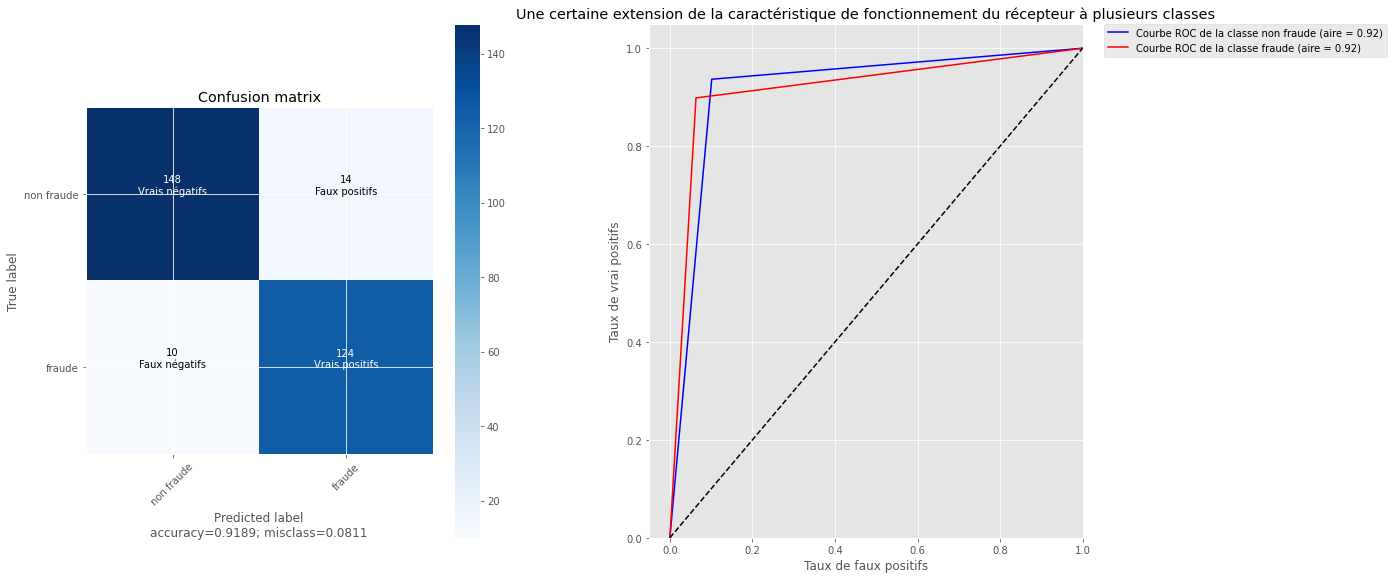

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       162
           1       0.90      0.93      0.91       134

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



In [61]:
report('Gradient boosting',y_test, y_predict, 
                      normalize    = False)

Toujours avec nos données normalisées, nous allons optimiser le paramètre **n_estimators** en fixant une grille de valeurs et nous choisissons: **learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, max_depth=8, max_features='sqrt', subsample=0.8 et random_state=10**

In [62]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
model=gsearch1.fit(x_train,y_train)

In [63]:
print('Best Parameters:', model.best_estimator_.get_params())

Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 50, 'min_samples_split': 500, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 10, 'subsample': 0.8, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [64]:
predict(model,x_train,y_train,x_test,y_test)
y_pred=model.predict(x_test)

GridSearchCV Training Accuracy: 96.84654%
GridSearchCV Testing  Accuracy: 96.56578%


**La précision obtenue avec le paramètre n_estimators a très bien améliorée notre modèle sur nos données de test! Nous sommes passés de 91.89% à 96.56%** 

------------------------------------------------Rapport de Gradient boosting Grille-------------------------------------------


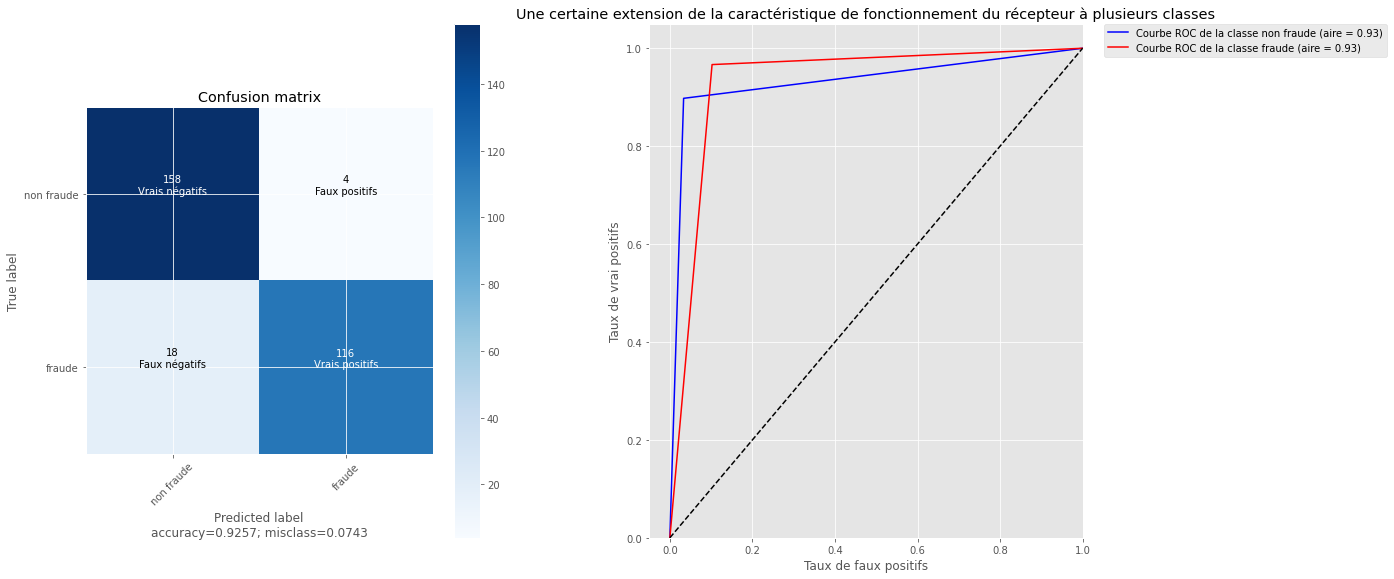

              precision    recall  f1-score   support

           0       0.90      0.98      0.93       162
           1       0.97      0.87      0.91       134

    accuracy                           0.93       296
   macro avg       0.93      0.92      0.92       296
weighted avg       0.93      0.93      0.93       296



In [65]:
report('Gradient boosting Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="xgboost">XGboost</a>

L'algorithme XGBoost est devenu l'arme ultime de nombreux scientifiques. C'est un algorithme très sophistiqué, assez puissant pour traiter toutes sortes d'irrégularités de données.

Construire un modèle en utilisant XGBoost est facile. Cependant, il est difficile d'améliorer le modèle à l'aide de XGBoost. Cet algorithme utilise plusieurs paramètres. Pour améliorer le modèle, le réglage des paramètres est indispensable. Sauf qu'il est très difficile de savoir quels sont les paramètres à optimiser.


Nous désignons l'arbres de la k-éme itération $f_{k}$, pour $k=1,...,K$.

Le modèle d'agrégation s'écrit: $$\sum_{k=1}^K f_{k} $$

Pour toutes observations $x_{i}$ donnée, la prédiction sera $$\hat{y_{i}}=\sum_{k=1}^K f_{k}(x_{i})$$

À l'itération t, $$\hat{y_{i}}^t=\hat{y_{i}}^{(t-1)}+f_{t}(x_{i})$$
À l’itération t, on définit la fonction objectif $$Objectif^{(t)}(\Theta)=\sum_{i=1}^n l(y_{i},\hat{y_{i}}^{(t-1)}+f_{t}(x_{i})+\sum_{k=1}^t  \Omega(f_{k}))$$
D'ou la décomposition de la fonction **Objectif** en somme de deux fonctions de **perte** et de **régularisation** 

Nous allons appliquer cette fois ci l'algorithme Extrême Gradient Boosting [**XGBoost**](https://xgboost.readthedocs.io/en/latest/parameter.html) à nos données.


In [66]:
import xgboost
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score  
model = XGBClassifier()
predict(model,x_train,y_train,x_test,y_test)
y_pred = model.predict(x_test)

XGBClassifier Training Accuracy: 100.0%
XGBClassifier Testing  Accuracy: 94.59459%


------------------------------------------------Rapport de XG boost-------------------------------------------


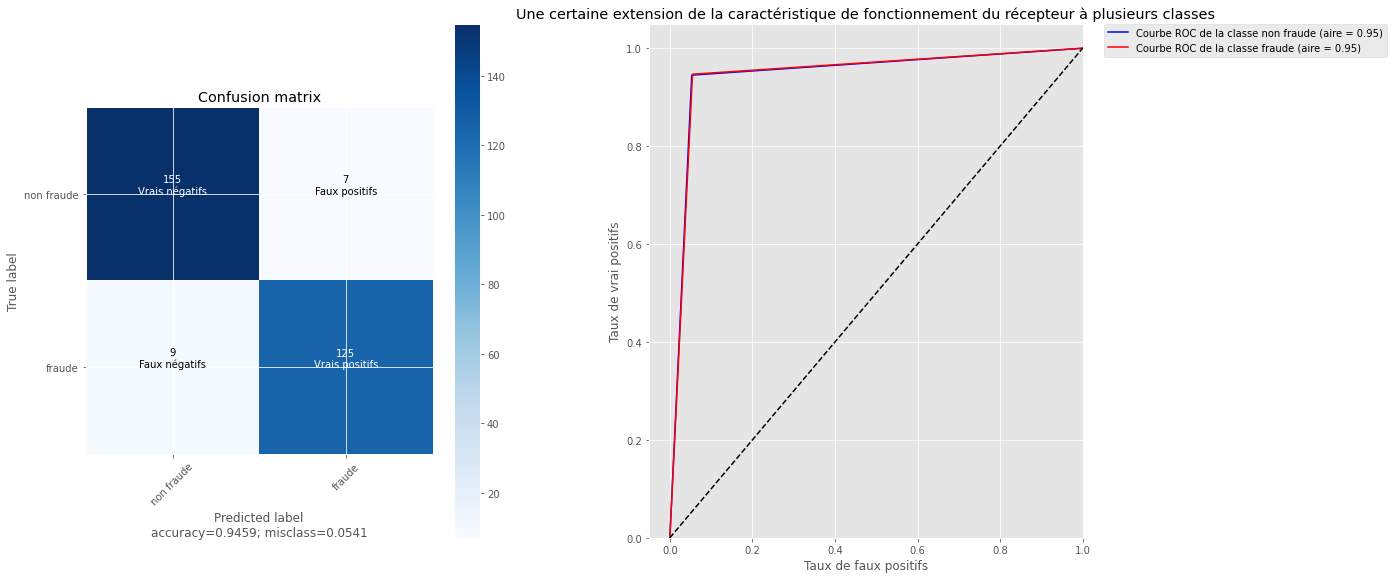

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.95      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.95       296
weighted avg       0.95      0.95      0.95       296



In [67]:
report('XG boost',y_test, y_pred, 
                      normalize    = False)

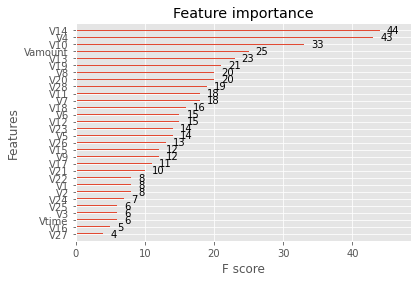

In [68]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

Grâce à XGBoost nous pouvons visualiser les variables les plus importantes à notre modèle. En effet, les variables V14, V4, V10 et Vamount sont en première position.

Afin d'améliorer la performance de XGBoost, on peut fixer une grille de valeurs au paramètre **max_depth** et chercher à l'optimiser comme il suit.

In [69]:
param_grid = {"max_depth": [3,8,10,12,19]}
model=XGBClassifier(subsample=0.33,objective='binary:logistic',n_estimators=300,learning_rate = 0.01)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

In [70]:
import warnings
warnings.filterwarnings("ignore")
best_model=grid_search.fit(x_test, y_test,eval_metric=["error", "logloss"])
y_pred=best_model.predict(x_test)

In [71]:
print('Best Parameters:', best_model.best_estimator_.get_params())


Best Parameters: {'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 300, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.33, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [72]:
predict(best_model,x_train,y_train,x_test,y_test)
y_pred=best_model.predict(x_test)

GridSearchCV Training Accuracy: 96.80233%
GridSearchCV Testing  Accuracy: 94.93243%


L'optimisation du paramètre **max_depth**  n'a pas améliorer de manière significative la précision sur nos données test.

------------------------------------------------Rapport de XG boost Grille-------------------------------------------


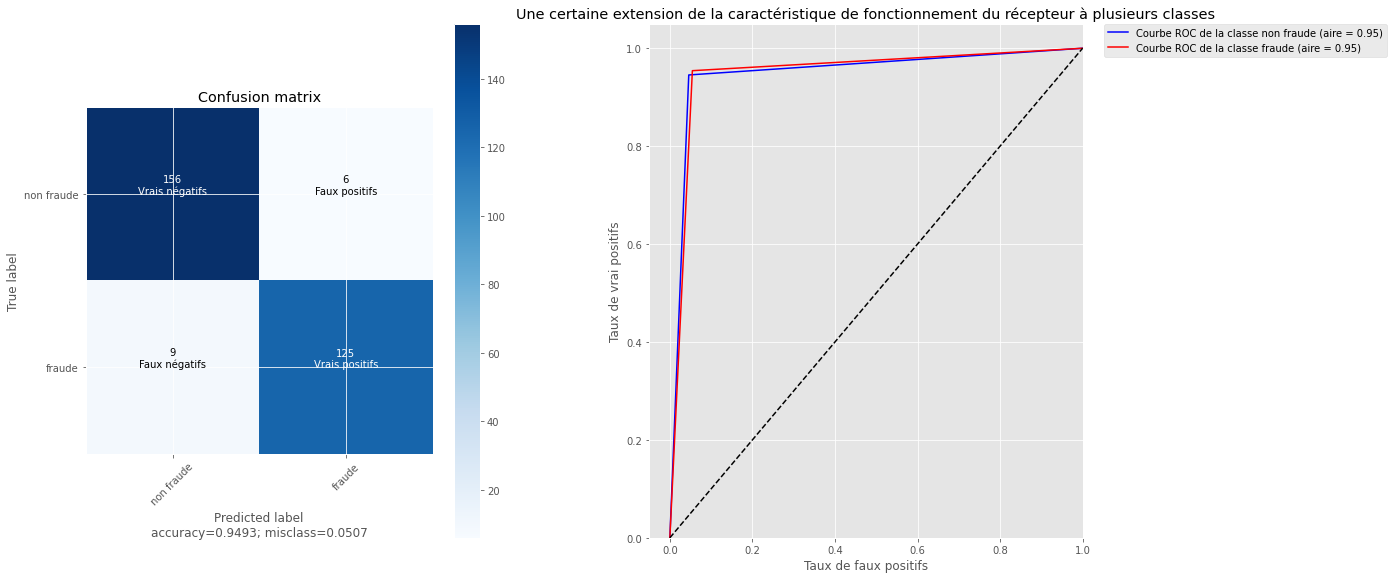

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.95      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [73]:
report('XG boost Grille',y_test, y_pred, 
                      normalize    = False)

## <a name="mlp">Perceptron Multicouche</a>

Le Perceptron multicouche ([MLP](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)) est un algorithme d'apprentissage supervisé plus particulèrement un [réseau de neurone](https://fr.wikipedia.org/wiki/R%C3%A9seau_de_neurones_artificiels) qui apprend une fonction par une formation sur un ensemble de données , où est le nombre de dimensions pour l'entrée et est le nombre de dimensions pour la sortie. Compte tenu d'un ensemble de caractéristiques $X = {x_1, x_2, ..., x_m}$ et une cible $y$, il peut apprendre un approximateur de fonction non linéaire pour la classification ou la régression. Il est différent de la régression logistique, en ce sens qu'entre la couche d'entrée et la couche de sortie, il peut y avoir une ou plusieurs couches non linéaires, appelées couches cachées. 

Mettons en place le [**Perceptron multicouche**](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) avec ces paramètres standard et une activation **logistic** qui correspond à la fonction sigmoïde de la régression logistique.

In [74]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation ='logistic')
predict(mlp,x_train,y_train,x_test,y_test)
y_pred = mlp.predict(x_test)

MLPClassifier Training Accuracy: 95.49419%
MLPClassifier Testing  Accuracy: 94.59459%


On obient un score de **94.59459%** sur nos données Test

------------------------------------------------Rapport de MLP Classifier-------------------------------------------


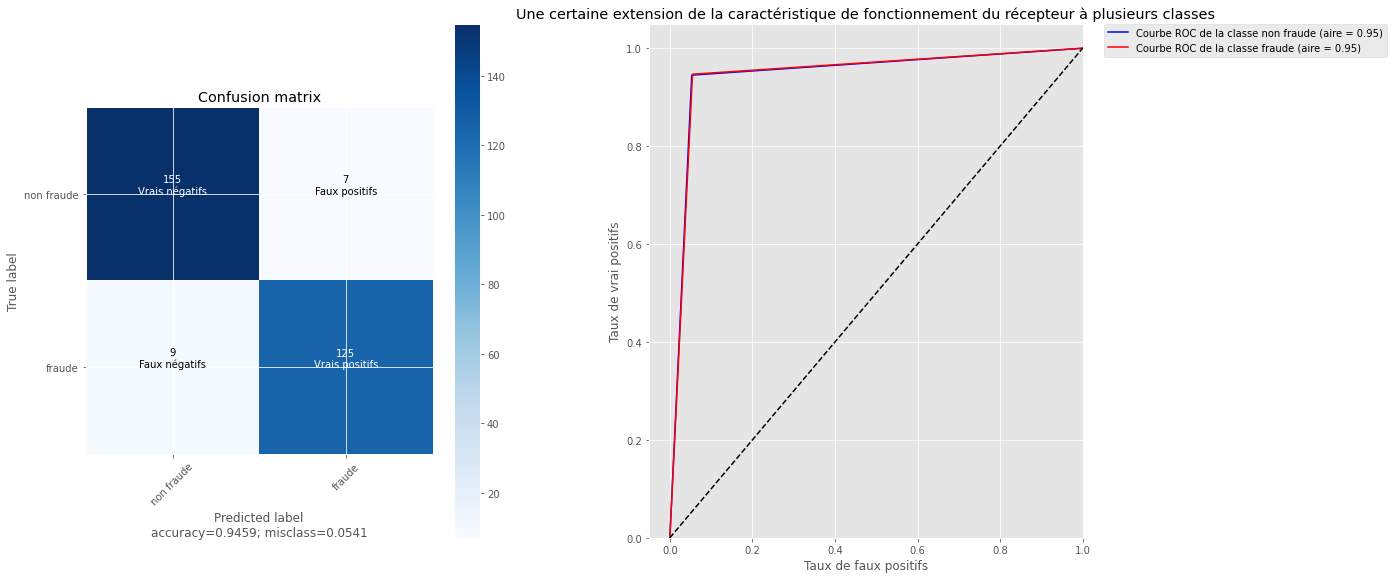

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.95      0.93      0.94       134

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.95       296
weighted avg       0.95      0.95      0.95       296



In [75]:
report('MLP Classifier',y_test, y_pred, 
                      normalize    = False)

# <a name="3">Conclusion</a>

## <a name="res">Résultats</a>

Finalement, nous constatons que la méthode la plus performantes est le **[Adaboost](#adaboost)** grâce à GridSearchCV. Le tableau ci-dessous résume l'ensemble des résultats obtenus avec chacun des algorithmes.

In [76]:
df_test =pd.DataFrame(list(test_results.items()),
                      columns=['Algorithm','Test_Acc'])
df_train =pd.DataFrame(list(train_results.items()),
                      columns=['Algorithm','Train_Acc'])
df_results = df_test.join(df_train.set_index('Algorithm'), on='Algorithm')
df_results.sort_values('Test_Acc',ascending=False)

,Algorithm,Test_Acc,Train_Acc
11,AdaBoostClassifier_GridSearchCV_,96.62162,97.09302
13,GradientBoostingClassifier_GridSearchCV_,96.56578,96.84654
9,RandomForestClassifier_GridSearchCV_,95.60811,97.52907
5,SVC_GridSearchCV_,95.27027,96.36628
8,RandomForestClassifier_,94.93243,100.00000
2,LogisticRegression_GridSearchCV_,94.93243,95.20349
15,XGBClassifier_GridSearchCV_,94.93243,96.80233
4,SVC_,94.93243,96.22093
14,XGBClassifier_,94.59459,100.00000
16,MLPClassifier_,94.59459,95.49419



Tableau de comparaison pour la selection du meilleur modèle 


## <a name="ref">Références</a>

- [Kaggle Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [Models of Fraud Detection and Analysis of Payment Transactions Using Machine Learning](http://ceur-ws.org/Vol-2422/paper04.pdf)
- [Sklearn GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [Joel Grus, Data science par la pratique](http://livre2.com/LIVREF/F6/F006061.pdf)
- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)
- [Github data_analysis_with_python](https://github.com/csmastersUH/data_analysis_with_python_2020)
- [Ricco Rakotomalala, Gradient Boosting: Technique ensembliste pour l'analyse prédictive](https://eric.univ-lyon2.fr/~ricco/cours/slides/gradient_boosting.pdf)
- [Librairie Xgboost](https://xgboost.readthedocs.io/en/latest/index.html)
